In [215]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.python.ops.logging_ops import Print

In [216]:
te_df = pd.read_csv('Combined_TE.csv')

In [217]:
print(te_df.head())

   Unnamed: 0        Team  Year Position  Value_cap_space  Value_draft_data  \
0           0  Buccaneers  2019       TE         5.658874        168.500283   
1           1     Packers  2019       TE         8.485654         74.891447   
2           2      Giants  2019       TE         0.409139        155.155097   
3           3  Commanders  2019       TE         0.611052         30.870044   
4           4    Patriots  2019       TE         1.424017          5.331186   

   Previous_AV  Current_AV  Previous_PFF  Current_PFF  ...  \
0          6.0         6.0     64.182220    56.750542  ...   
1          7.0         6.0     58.965724    60.298620  ...   
2          8.0         6.0     68.384703    60.821007  ...   
3          7.0         7.0     63.836041    51.438926  ...   
4          6.0         3.0     68.011263    52.240488  ...   

  Previous_targeted_qb_rating  Previous_targets  Previous_touchdowns  \
0                  104.758915         45.919897             5.377261   
1       

In [218]:
def check_correlation(df, metric):
    pd.set_option('display.max_rows', None)

    features = [col for col in df.columns if
                col != metric and col != 'weighted_avg_franchise_id' and col != 'weighted_avg_spikes' and col != 'Team' and col != 'Year' and col != 'Position']
    prev = [x for x in features if 'Previous' in x]
    prev.append('Current_' + metric)
    curr = [x for x in features if 'Previous' not in x]
    df['Total DVOA'] = df['Total DVOA'].astype(str).str.rstrip('%').astype(float) / 100.0
    l = [curr, prev]
    for item in l:
        # Filter only the relevant columns
        corr_df = df[item]

        # Compute the correlation matrix
        corr_matrix = corr_df.corr()
        target_corr = corr_matrix[['Current_' + metric]].drop('Current_' + metric).sort_values(by='Current_' + metric,
                                                                                               ascending=False)  # Select correlation with 'metric' and exclude itself

        # Print the correlation matrix
        print(f'Correlation Matrix for {metric}:\n', target_corr, '\n')
        pd.reset_option('display.max_rows')


In [219]:
te_df = te_df.drop(columns=['Unnamed: 0', 'Team', 'Year', 'Position', 'position'])

In [220]:
check_correlation(te_df, 'PFF')

Correlation Matrix for PFF:
                                               Current_PFF
weighted_avg_grades_offense                      0.980074
weighted_avg_grades_pass_route                   0.922753
weighted_avg_yprr                                0.873494
Current_AV                                       0.775827
weighted_avg_first_downs                         0.714361
weighted_avg_yards                               0.707208
weighted_avg_yards_after_catch                   0.616858
weighted_avg_receptions                          0.613988
weighted_avg_targets                             0.588298
weighted_avg_avoided_tackles                     0.568367
weighted_avg_touchdowns                          0.558774
weighted_avg_contested_receptions                0.495002
weighted_avg_grades_hands_drop                   0.478849
weighted_avg_contested_targets                   0.465099
weighted_avg_targeted_qb_rating                  0.434677
Total DVOA                                 

In [221]:
te_df = pd.read_csv('Combined_TE.csv')

In [222]:
te_df = te_df.sort_values(by=['Team', 'Year'])
te_df = te_df.drop(columns=['Unnamed: 0'])

# Display the sorted data
print(te_df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       TE         1.073326         11.712493         11.0   
50   49ers  2020       TE         4.167508         19.697123         12.0   
70   49ers  2021       TE         4.306849          8.549011          9.0   
123  49ers  2022       TE         4.971182         15.377953          8.0   
12   Bears  2019       TE         0.759830         83.725492          5.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         12.0     85.088580    82.303247     27.90%  ...   
50          9.0     82.303247    70.863812      5.40%  ...   
70          8.0     70.863812    83.360252     19.50%  ...   
123        10.0     83.360252    75.179377     27.60%  ...   
12          3.0     64.011478    56.221746     -2.10%  ...   

     Previous_targeted_qb_rating  Previous_targets Previous_touchdowns  \
17                    107.115591        123.322581            4.833333   
50              

In [223]:
team_data = te_df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x284269eb0>>


In [224]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_grades_offense', 'weighted_avg_grades_pass_route', 'weighted_avg_yprr', 'Current_AV', 'weighted_avg_first_downs', 'weighted_avg_yards']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['win-loss-pct']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [225]:
# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print('hi')  # Should now be (samples, 3, features)
print(X)

hi
[[[8.25020979e+01 8.33706294e+01 2.31692308e+00 1.20000000e+01
   3.84685315e+01 7.42979021e+02]
  [7.13843511e+01 7.58683206e+01 1.82000000e+00 9.00000000e+00
   2.00839695e+01 3.66007634e+02]
  [8.28026042e+01 8.19645833e+01 1.93729167e+00 8.00000000e+00
   3.26093750e+01 6.95317708e+02]]

 [[5.36424893e+01 5.32931330e+01 7.57467811e-01 3.00000000e+00
   4.35622318e+00 7.80729614e+01]
  [6.12381818e+01 6.21127273e+01 1.06800000e+00 6.00000000e+00
   2.43636364e+01 3.71345455e+02]
  [6.41820375e+01 6.40986595e+01 1.20238606e+00 7.00000000e+00
   2.39302949e+01 4.98067024e+02]]

 [[6.29851563e+01 6.35914062e+01 1.16128906e+00 5.00000000e+00
   2.13945312e+01 3.91632812e+02]
  [5.97656863e+01 5.39274510e+01 9.16568627e-01 4.00000000e+00
   1.23529412e+01 2.59382353e+02]
  [6.11624161e+01 5.84469799e+01 1.01885906e+00 6.00000000e+00
   2.16241611e+01 4.46140940e+02]]

 [[6.06208333e+01 5.64910714e+01 1.14547619e+00 5.00000000e+00
   1.13928571e+01 2.84630952e+02]
  [6.17455696e+01 5.8

In [226]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Combined_TE.csv')
metric_column = 'Previous_PFF'

# Directly use 'Previous_PFF' for pff_column and 'Previous_AV' for av_column
pff_column = 'Previous_PFF'
av_column = 'Previous_AV'


# Print the column names to verify
print(f'Resolved Columns:')
print(f'pff_column: {pff_column}')
print(f'av_column: {av_column}')

# Training and testing data (years 2019, 2020, 2021 for training, 2022 for testing)
features_train = df[df['Year'] <= 2021][
    ['Previous_yprr', 'Previous_grades_pass_route', 'Previous_PFF', 
     'Previous_grades_offense', 'Previous_yards', 'Previous_first_downs', 
     'Previous_AV', 'Previous_targets', pff_column]
]
labels_train = df[df['Year'] <= 2021][metric_column]

features_test = df[df['Year'] == 2022][
    ['Previous_yprr', 'Previous_grades_pass_route', 'Previous_PFF', 
     'Previous_grades_offense', 'Previous_yards', 'Previous_first_downs', 
     'Previous_AV', 'Previous_targets', pff_column]
]
labels_test = df[df['Year'] == 2022][metric_column]

# Apply one-hot encoding to any categorical features if necessary (e.g., if you have 'Team')
features_train = pd.get_dummies(features_train)
features_test = pd.get_dummies(features_test)

# Ensure both datasets have the same columns after encoding
features_train, features_test = features_train.align(features_test, join='left', axis=1, fill_value=0)

# Standardize the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),  # 10 neurons in one hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

# Train the model
history = model.fit(features_train, labels_train, epochs=170, batch_size=32, validation_split=0.2, verbose=0)
# Predictions
train_predictions = model.predict(features_train).flatten()
test_predictions = model.predict(features_test).flatten()

# Calculate R² scores
train_r2 = r2_score(labels_train, train_predictions)
test_r2 = r2_score(labels_test, test_predictions)

print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")


Resolved Columns:
pff_column: Previous_PFF
av_column: Previous_AV
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training R²: 0.41
Test R²: 0.27


# RNN PLAYERPredictions

In [238]:
te_df = pd.read_csv('Combined_TE.csv') #Reading in Combined Positional data #Using Average Breakaway Yards to Predict

In [239]:
drop_col = ['Unnamed: 0']
te_df = te_df.drop(columns=drop_col)

In [240]:
team_data = te_df.groupby('Team')
print(te_df.head(32)) #check all the teams are have their te values grouped

          Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
0   Buccaneers  2019       TE         5.658874        168.500283          6.0   
1      Packers  2019       TE         8.485654         74.891447          7.0   
2       Giants  2019       TE         0.409139        155.155097          8.0   
3   Commanders  2019       TE         0.611052         30.870044          7.0   
4     Patriots  2019       TE         1.424017          5.331186          6.0   
5      Vikings  2019       TE         2.784272        141.593609          6.0   
6      Broncos  2019       TE         3.570670        293.070871          5.0   
7      Falcons  2019       TE         2.582359         30.349045          7.0   
8      Bengals  2019       TE         5.770457        171.815269          7.0   
9        Colts  2019       TE         3.538789        105.746055         11.0   
10    Steelers  2019       TE         3.676939         56.417254          9.0   
11     Jaguars  2019       T

In [241]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_yprr', 'Previous_grades_pass_route', 'Previous_PFF', 
            'Previous_grades_offense', 'Previous_yards', 'Previous_first_downs', 'Previous_AV', 'Previous_targets']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [243]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.1)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [244]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 3754.0720 - val_loss: 4210.9165
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3513.3652 - val_loss: 4082.4910
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3437.9106 - val_loss: 3945.8533
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3139.6355 - val_loss: 3790.1108
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3118.0730 - val_loss: 3600.2175
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2920.8662 - val_loss: 3376.9922
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2766.3992 - val_loss: 3106.6780
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2539.9709 - val_loss: 2784.0867
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2210.6809 - val_loss: 2412.1770
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1942.3572 - val_loss: 1995.4779
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1489.3895 - val_loss: 1545.7087
Epoch 12/200
4/4 ━

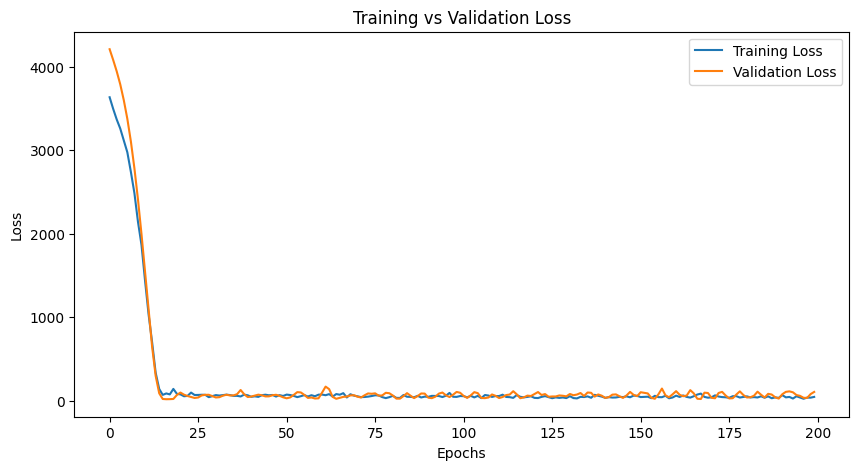

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
R² Score: -0.0785


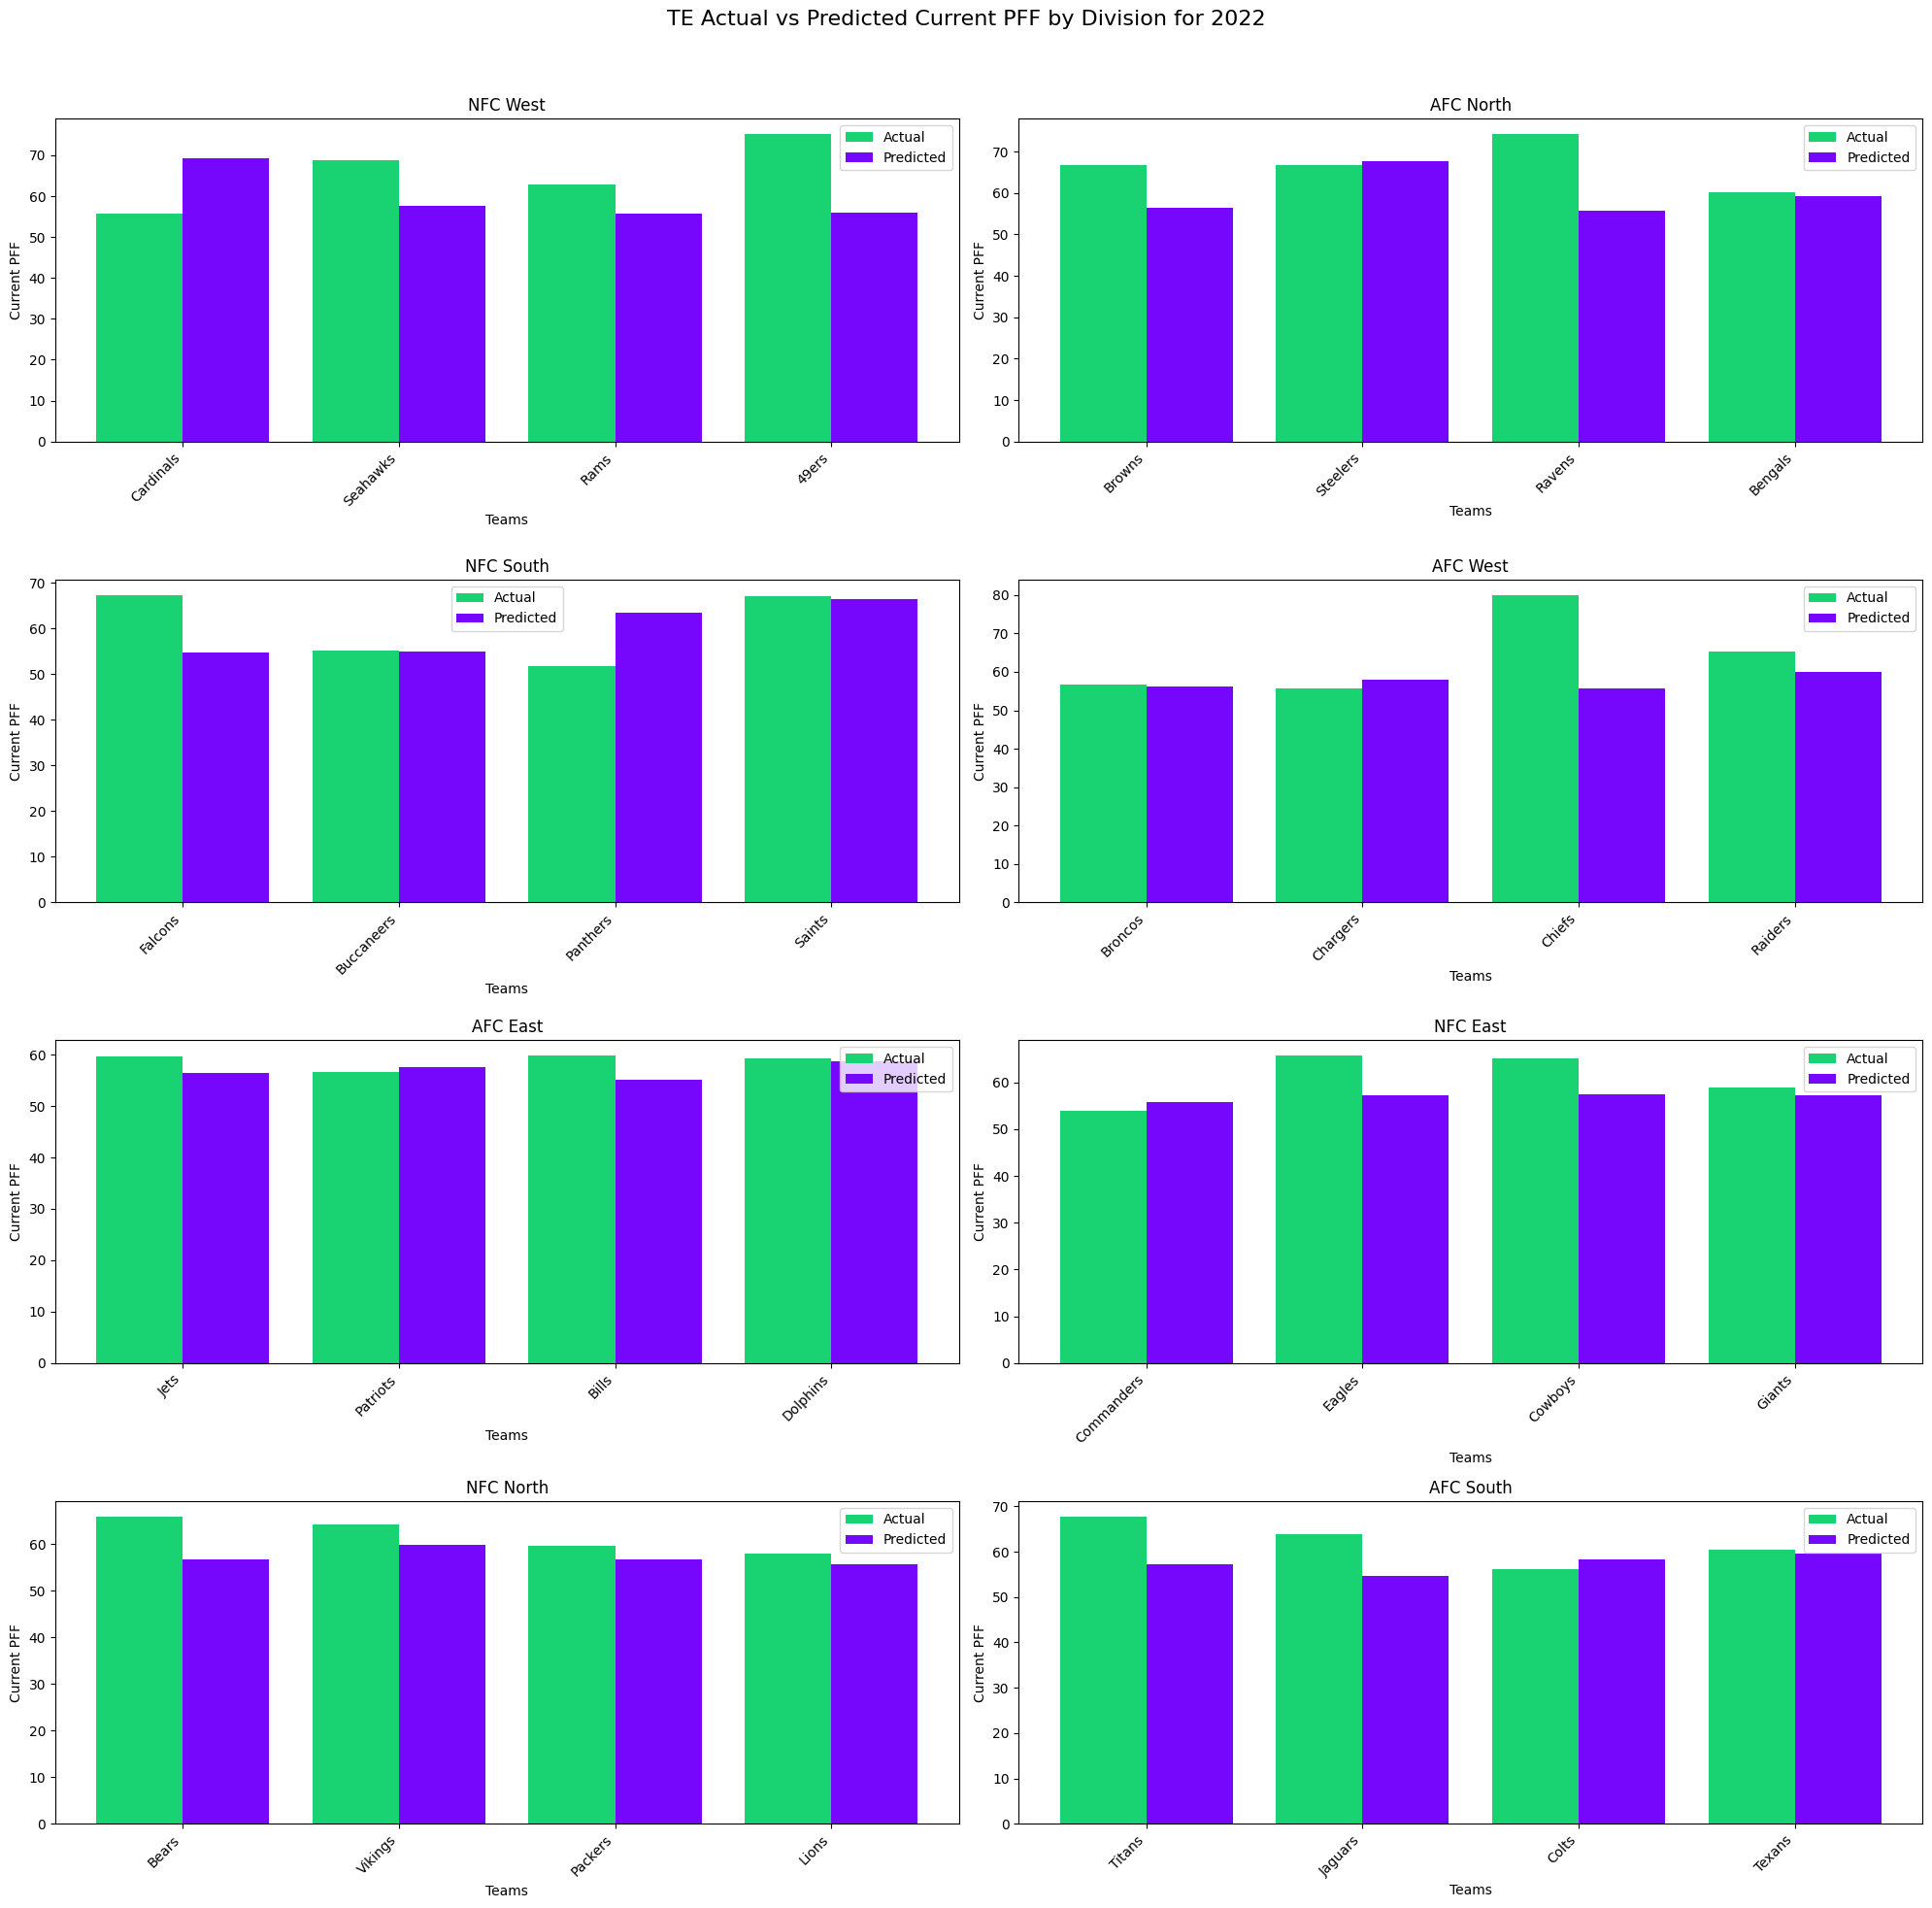

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 66.1946 - val_loss: 51.5134
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.1824 - val_loss: 48.6978
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.1782 - val_loss: 82.0120
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.2861 - val_loss: 70.7208
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.4437 - val_loss: 26.8548
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.3726 - val_loss: 21.6967
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.1187 - val_loss: 51.6129
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.4288 - val_loss: 181.4722
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.9864 - val_loss: 162.2183
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.9653 - val_loss: 61.4544
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.8958 - val_loss: 29.3294
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43

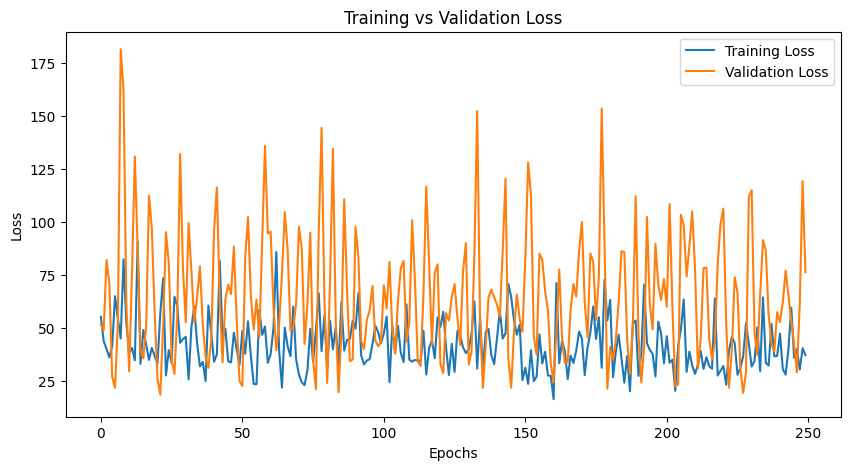

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R² Score: 0.2209


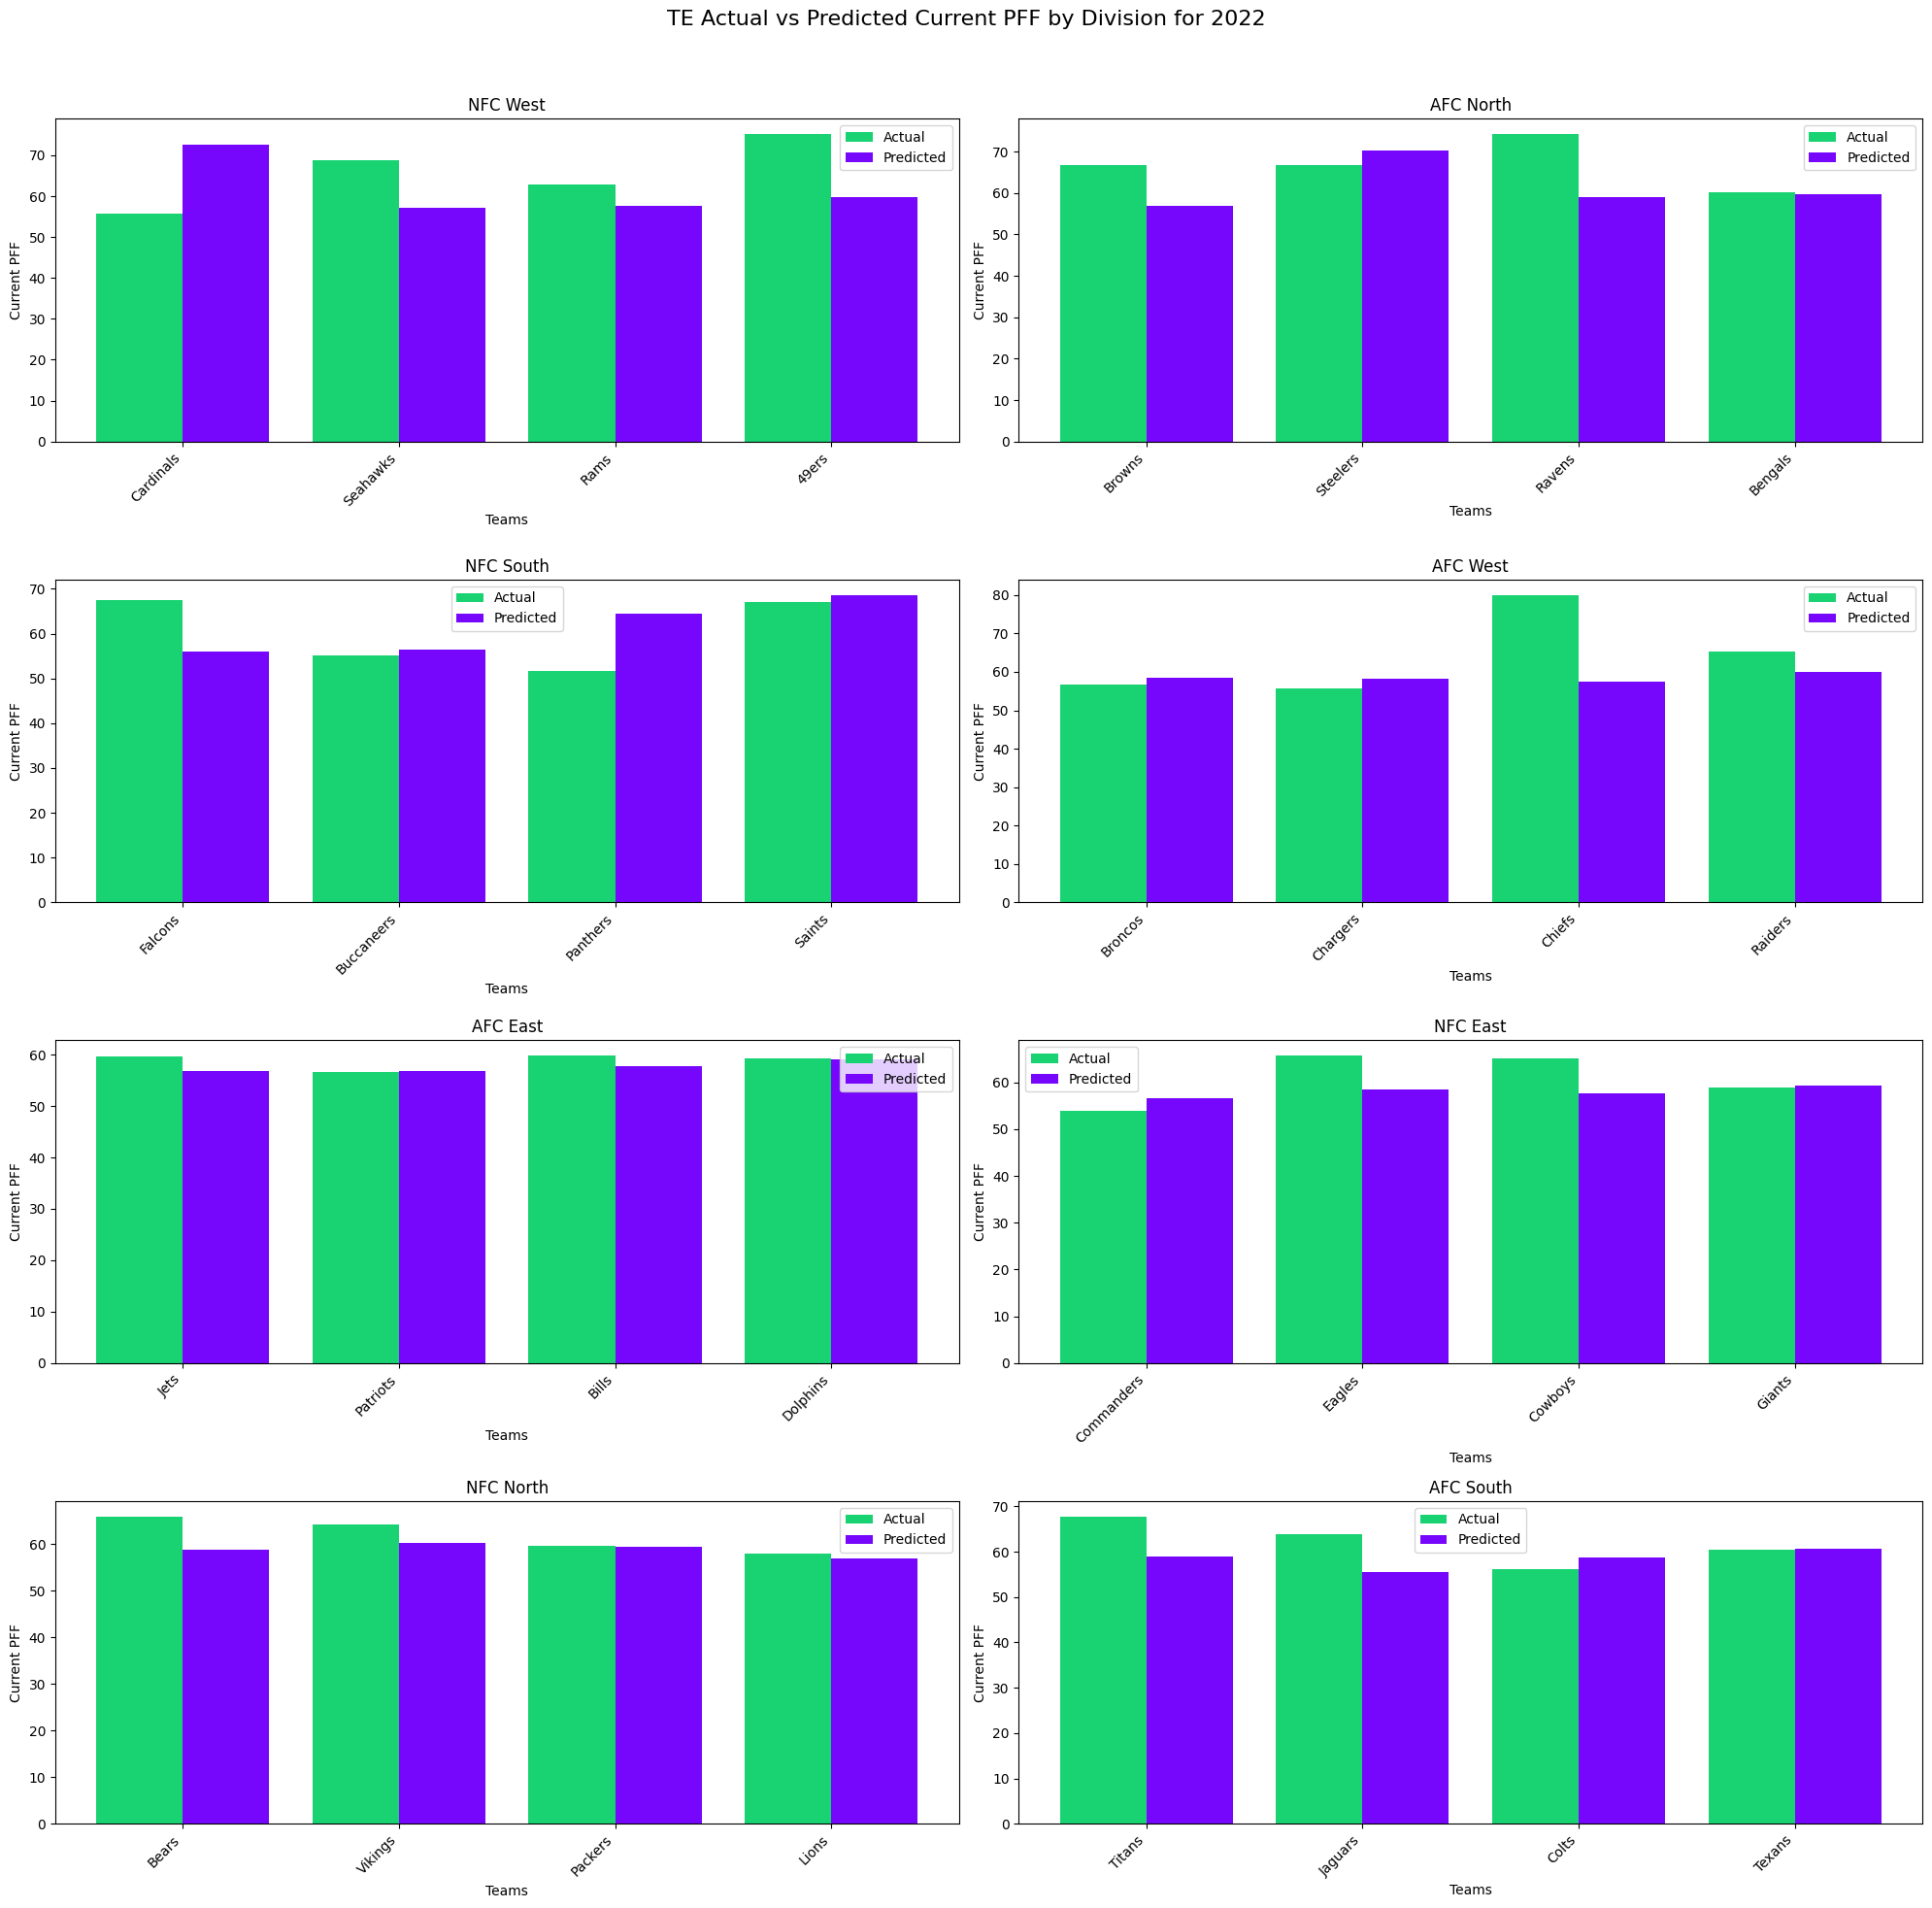

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 52.0718 - val_loss: 50.4955
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.3480 - val_loss: 70.5718
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.5944 - val_loss: 80.6811
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.5255 - val_loss: 57.8488
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.3914 - val_loss: 49.6797
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.3803 - val_loss: 57.5984
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.2838 - val_loss: 52.4096
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.3246 - val_loss: 58.0528
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.0187 - val_loss: 70.9957
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.4163 - val_loss: 75.8587
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 54.9008 - val_loss: 65.2119
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49.6

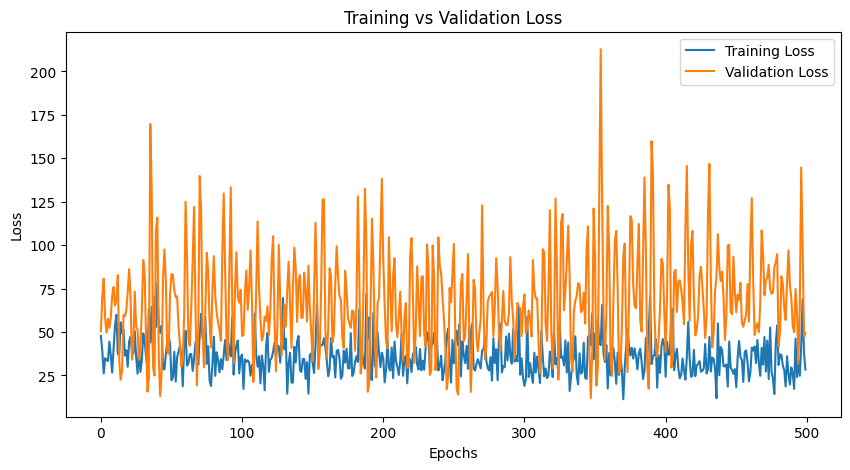

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R² Score: 0.4654


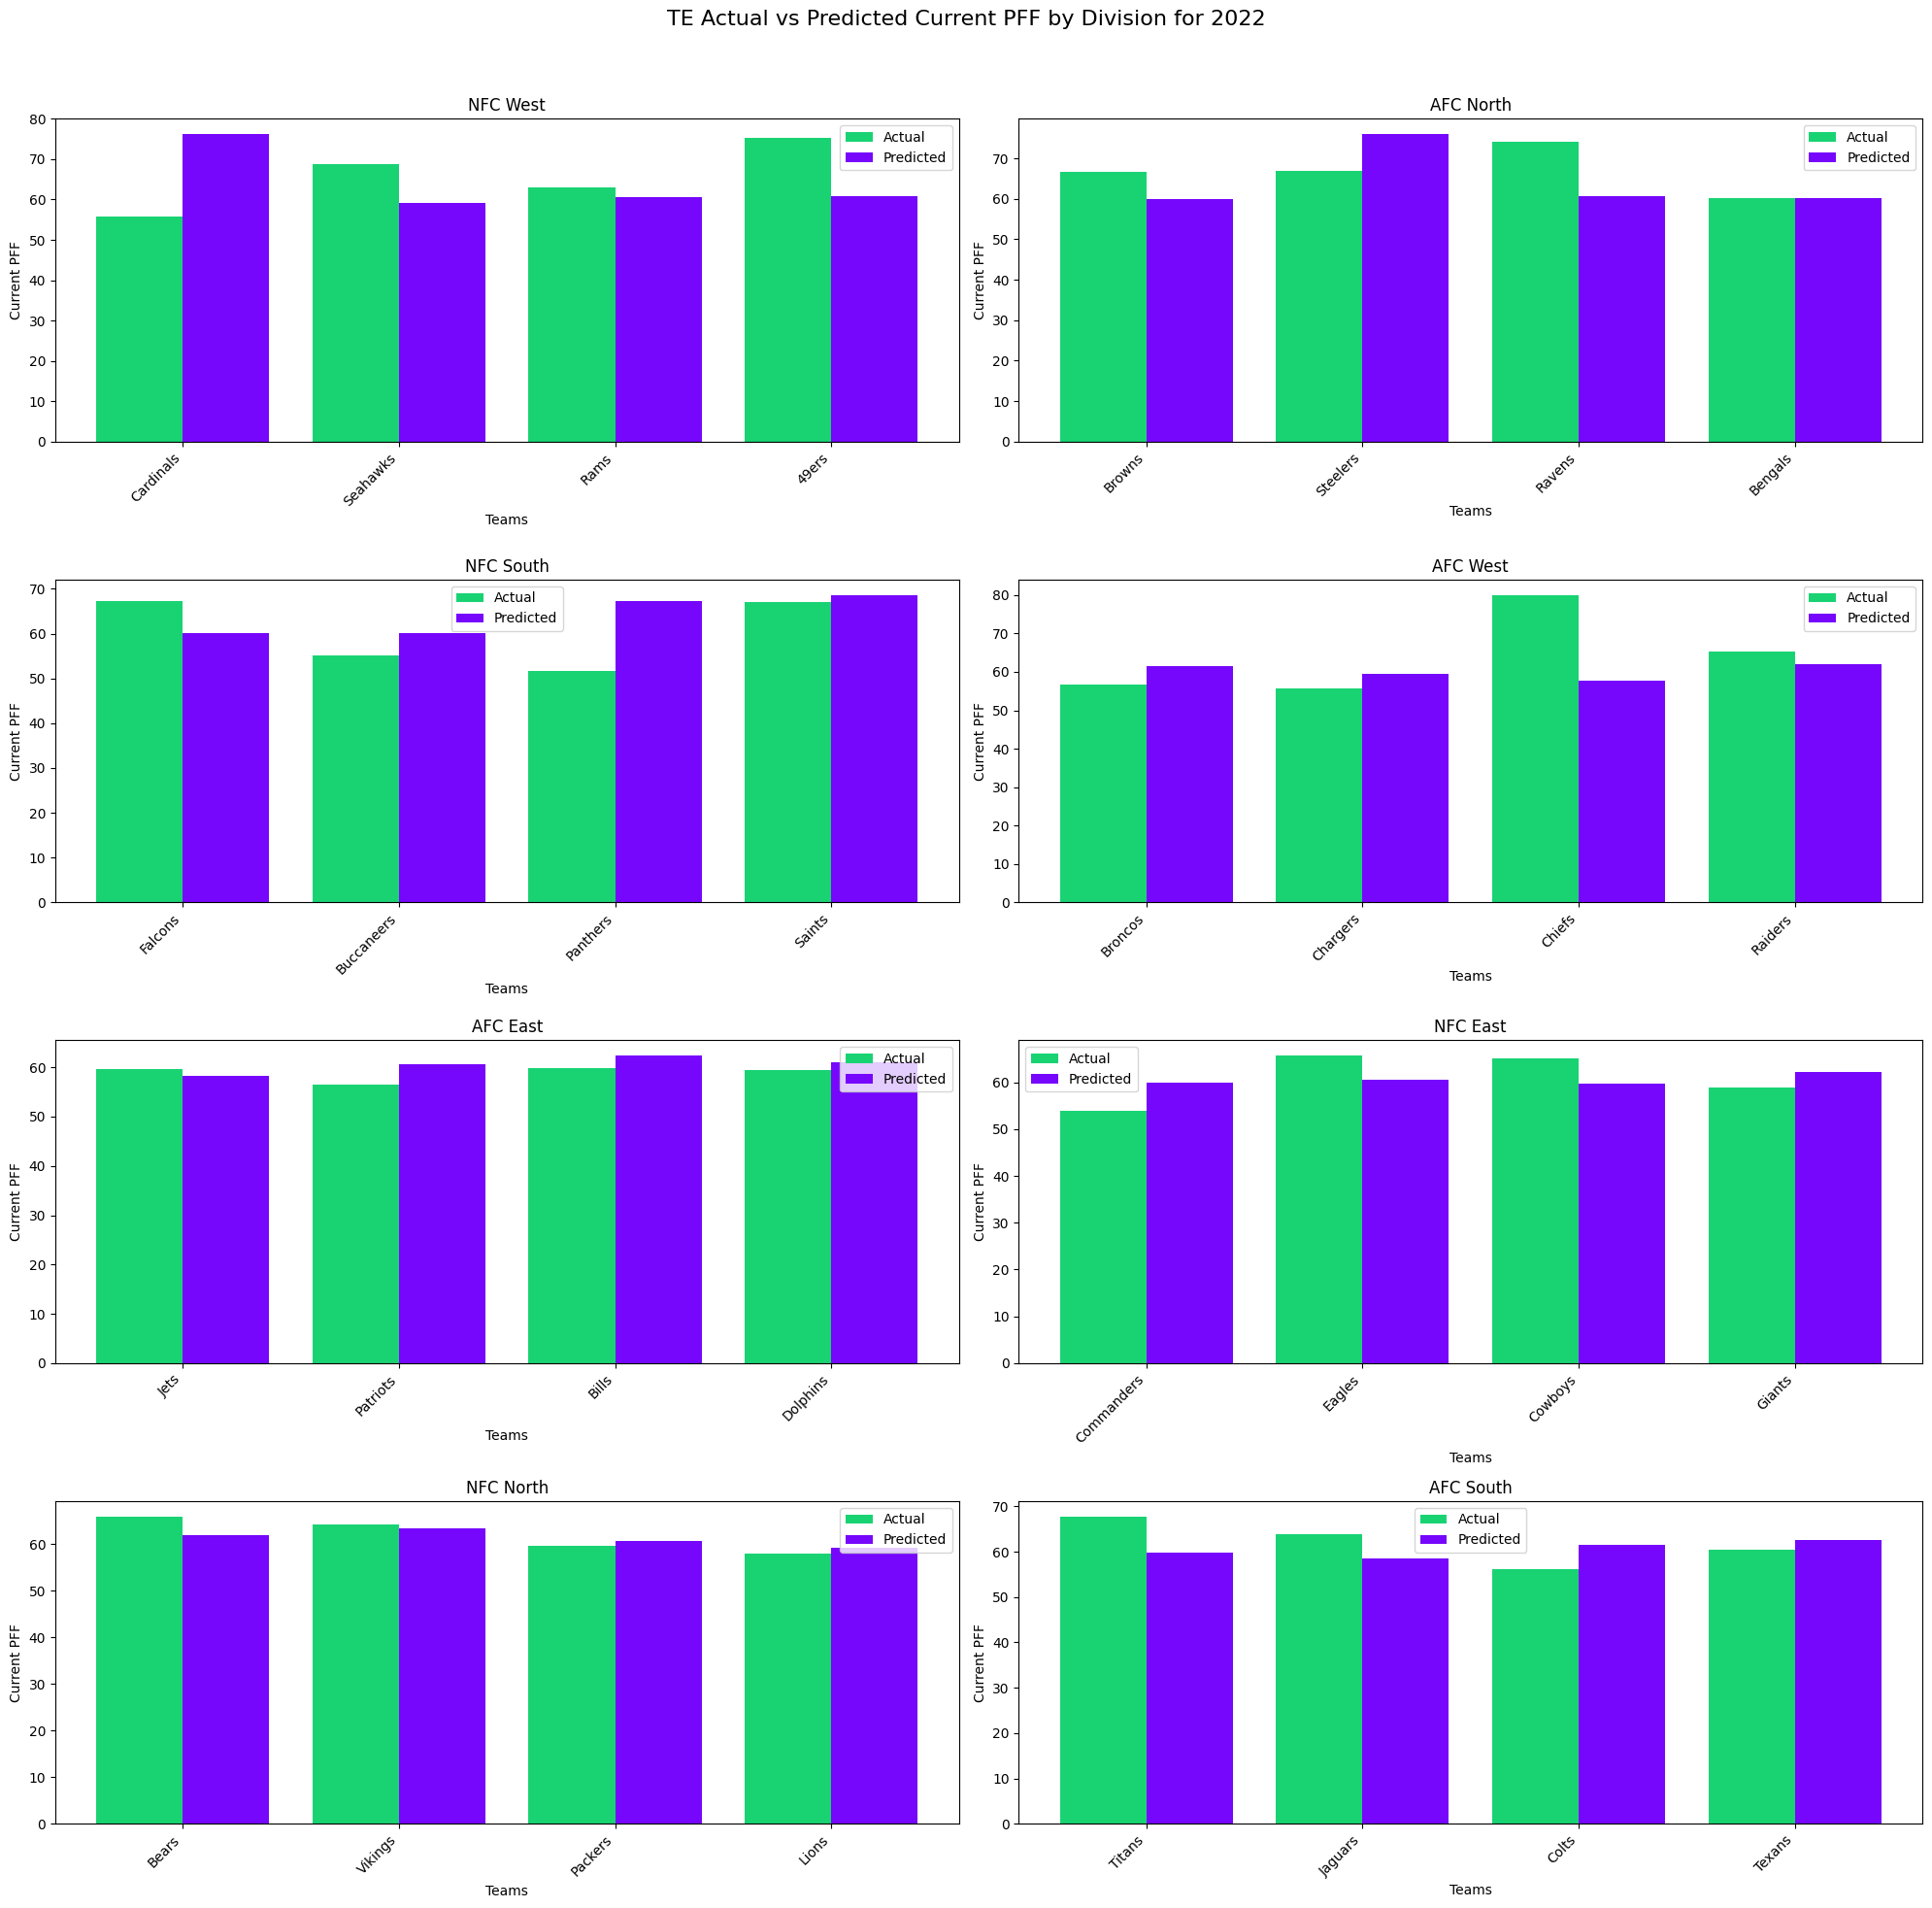

Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.2840 - val_loss: 82.1798
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 46.9290 - val_loss: 79.2123
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 29.6378 - val_loss: 58.2860
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.1224 - val_loss: 51.1601
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29.4810 - val_loss: 62.0217
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.7159 - val_loss: 84.8511
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.6216 - val_loss: 95.0389
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.7702 - val_loss: 92.8496
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.7298 - val_loss: 77.6597
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.6345 - val_loss: 28.2798
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.3697 - val_loss: 29.3536
Epoch 12/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4

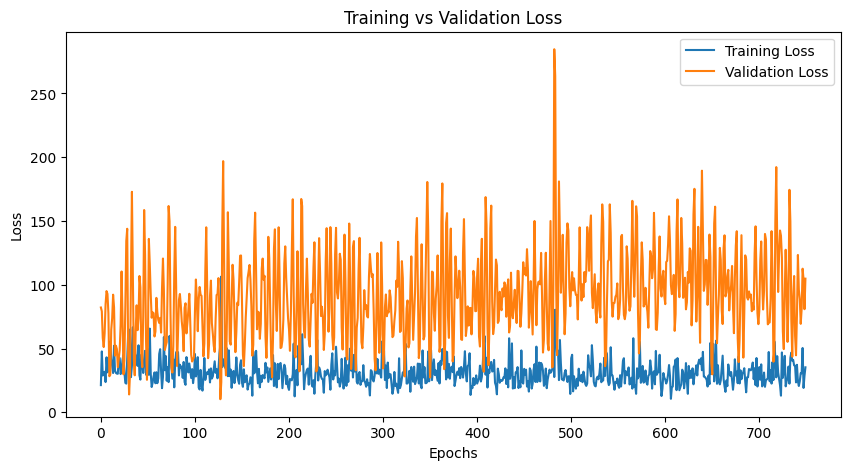

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R² Score: 0.2687


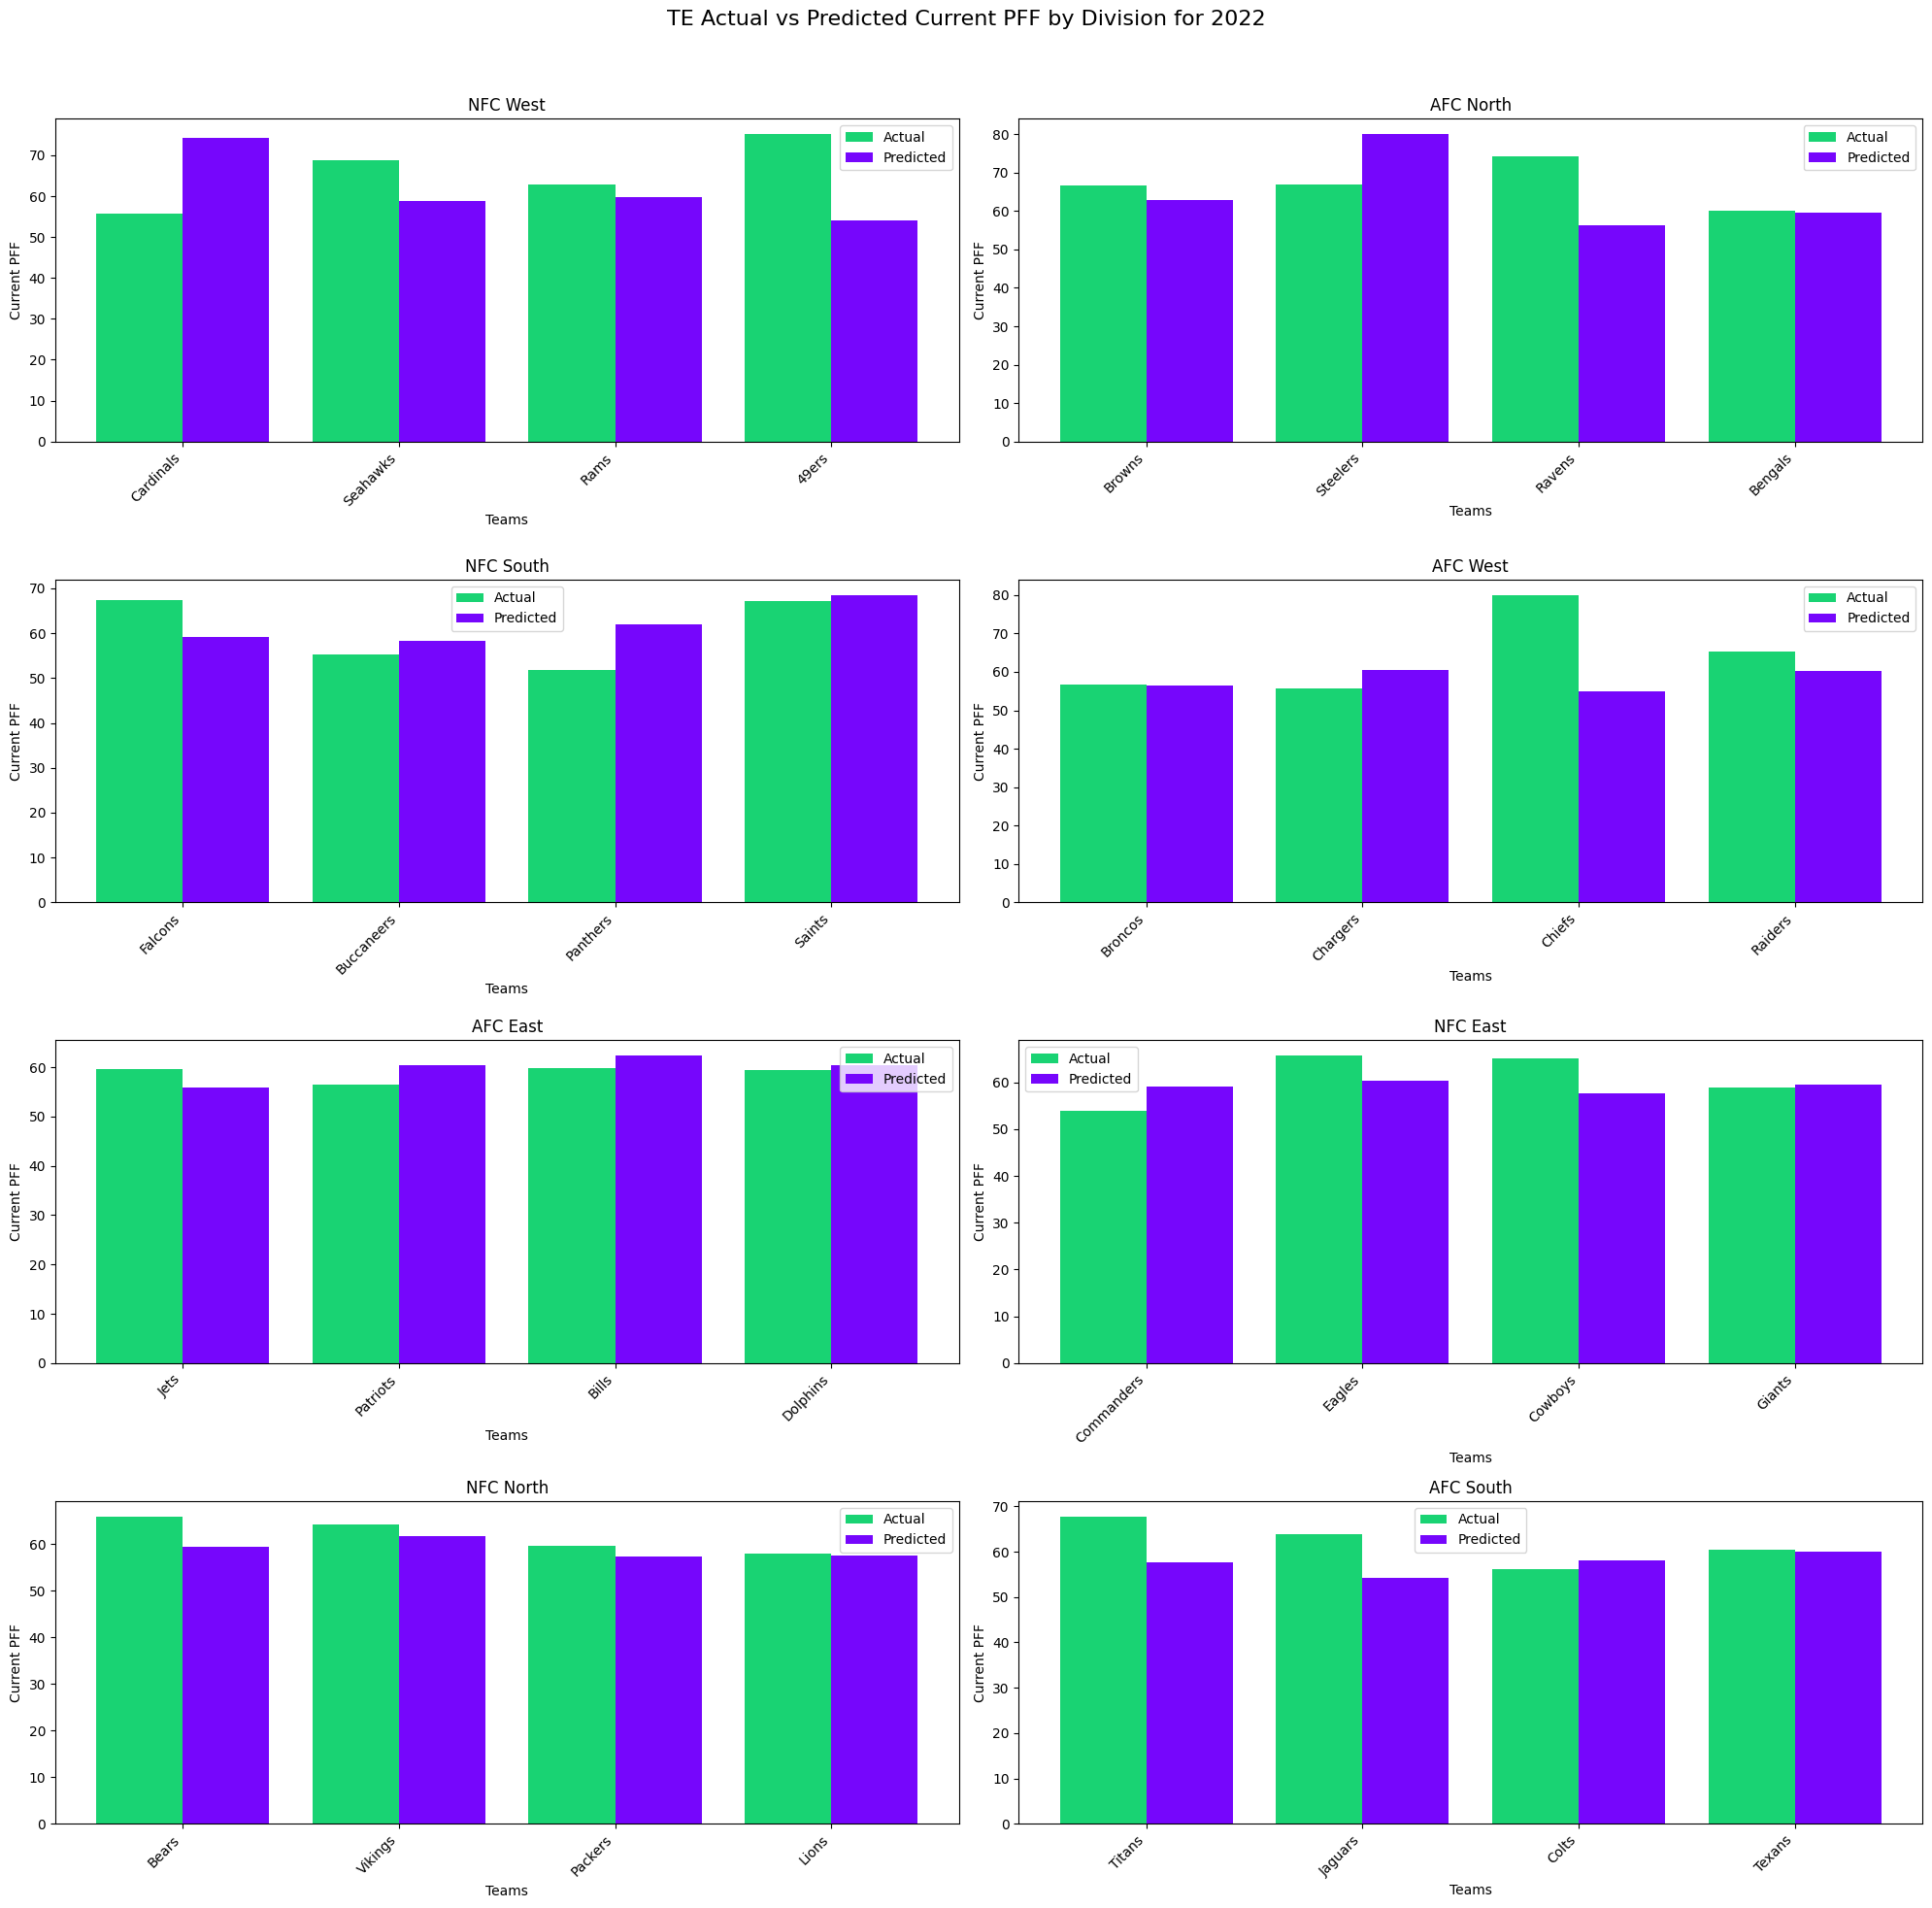

In [245]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [200, 250, 500, 750]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    data = te_df[te_df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('TE Actual vs Predicted Current PFF by Division for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()



# RNN Team predictions 

In [252]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load data
te_df = pd.read_csv('Combined_TE.csv')
te_df = te_df.drop(columns=['Unnamed: 0'])

# Encode categorical variables if any
# (This assumes `te_df` is your dataframe with all variables)
categorical_columns = te_df.select_dtypes(include=['object', 'category']).columns
numeric_columns = te_df.select_dtypes(include=['number']).columns

# Handle categorical variables with one-hot encoding
encoded_df = pd.get_dummies(te_df, columns=categorical_columns, drop_first=True)

# Calculate correlation with `win-loss-pct`
correlation_matrix = encoded_df.corr()
correlation_with_target = correlation_matrix['win-loss-pct'].sort_values(ascending=False)

# Display the correlations for all variables
print("Correlation of all variables with win-loss-pct:")
print(correlation_with_target)

# Find the best correlating variable
best_variable = correlation_with_target.index[1]  # Skip `win-loss-pct` itself
best_correlation = correlation_with_target.iloc[1]

print("\nTop 5 positively correlated variables:")
print(correlation_with_target.head(9))  # Skip the first row (win-loss-pct itself)

print(f"\nThe variable most correlated with win-loss-pct is '{best_variable}' with a correlation of {best_correlation:.4f}.")


Correlation of all variables with win-loss-pct:
win-loss-pct                       1.000000
Net EPA                            0.879836
weighted_avg_touchdowns            0.454373
weighted_avg_targeted_qb_rating    0.429406
Current_AV                         0.410278
                                     ...   
Team_Lions                        -0.183892
Value_draft_data                  -0.197974
Team_Jaguars                      -0.198519
Total DVOA_-27.90%                -0.201381
weighted_avg_pass_block_rate      -0.202117
Name: win-loss-pct, Length: 230, dtype: float64

Top 5 positively correlated variables:
win-loss-pct                       1.000000
Net EPA                            0.879836
weighted_avg_touchdowns            0.454373
weighted_avg_targeted_qb_rating    0.429406
Current_AV                         0.410278
Previous_yards_per_reception       0.395447
Current_PFF                        0.381811
weighted_avg_grades_offense        0.361164
Previous_targeted_qb_rating 

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

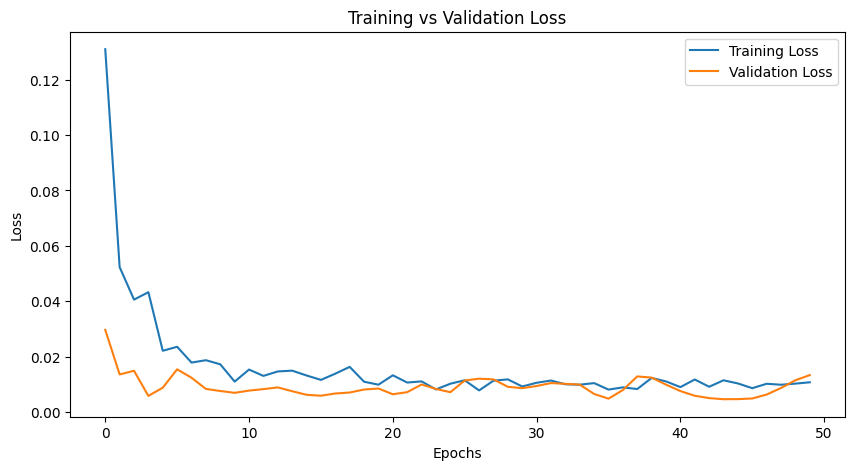

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
32
R² Score: -0.3298


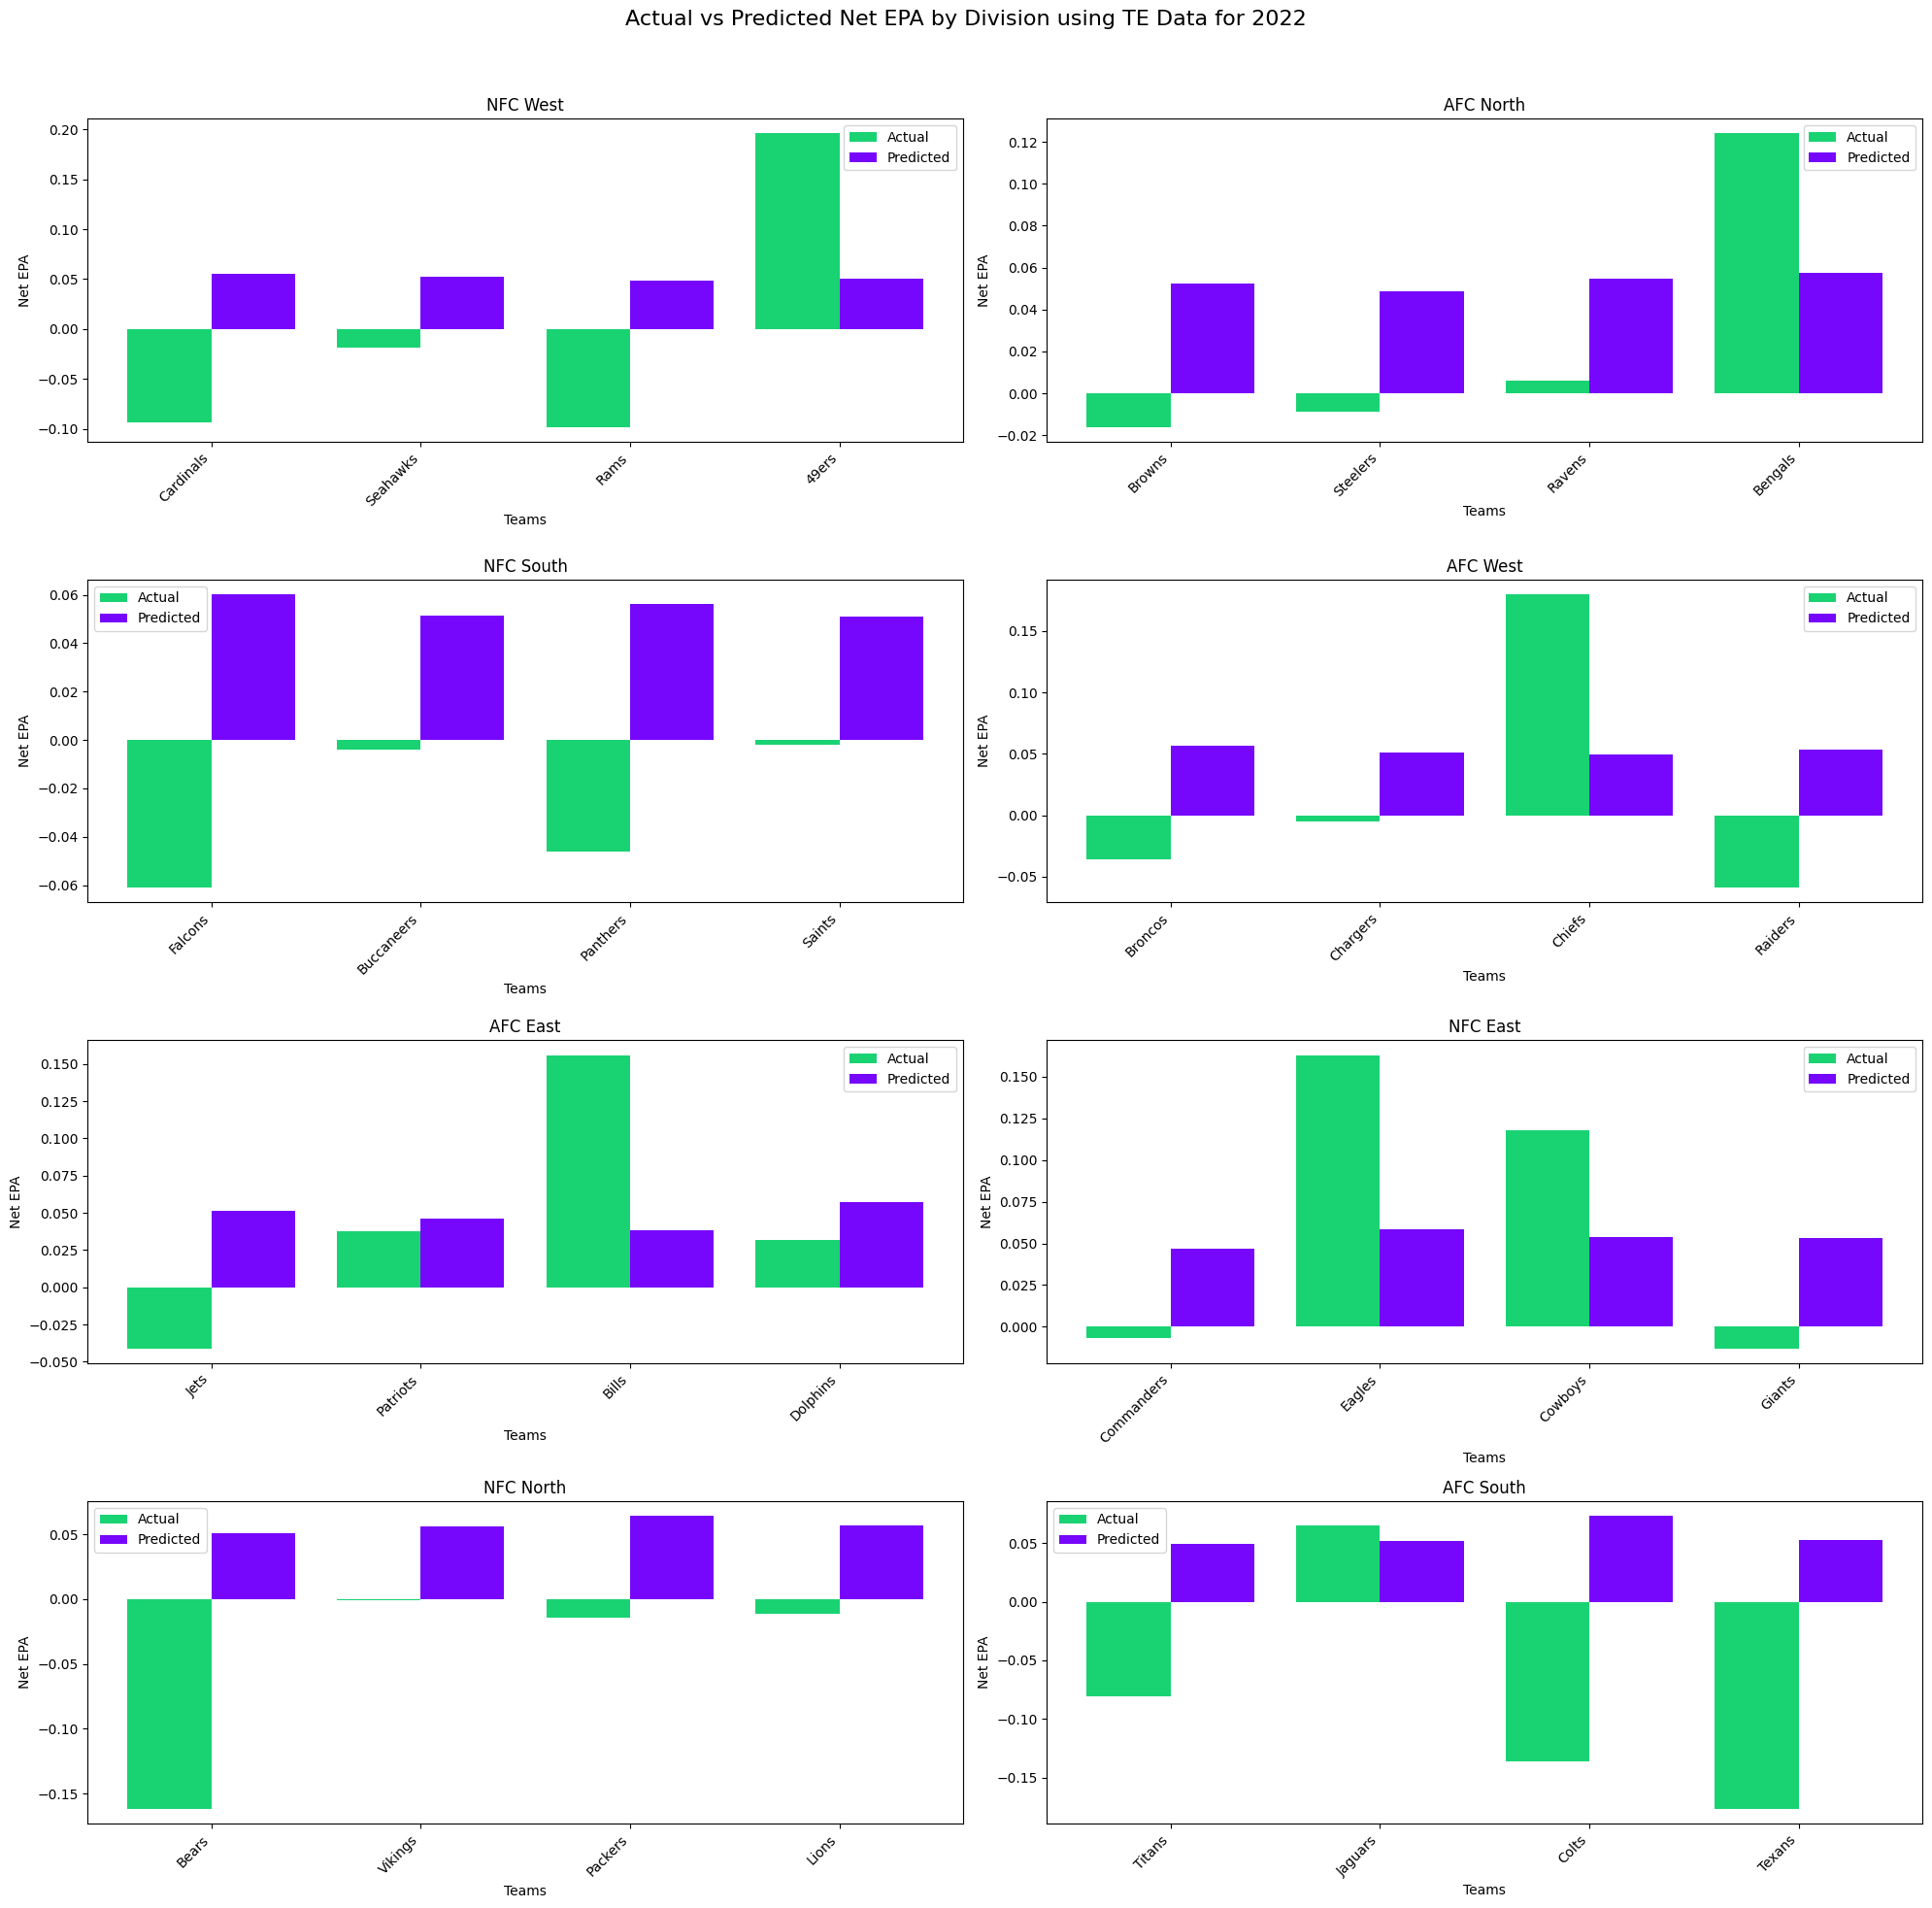

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0118 - val_loss: 0.0116
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0090
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - val_loss: 0.0064
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - val_loss: 0.0045
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0075
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - val_loss: 0.0085
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0075
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - val_loss: 0.0066
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0063


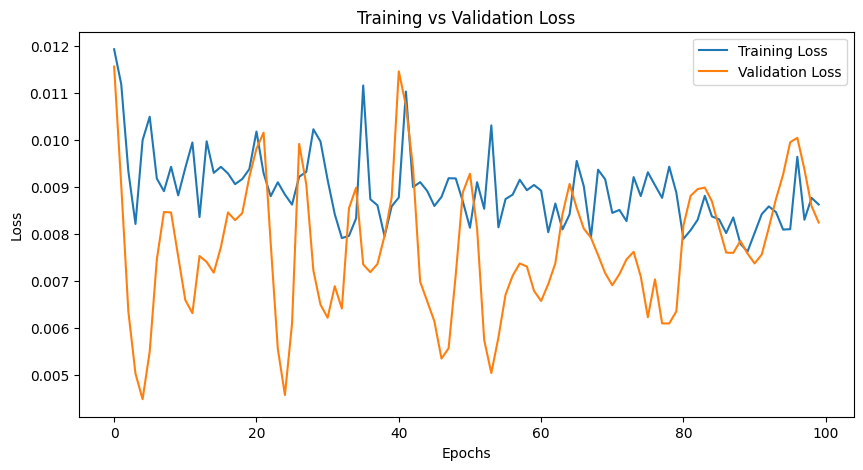

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
32
R² Score: 0.0075


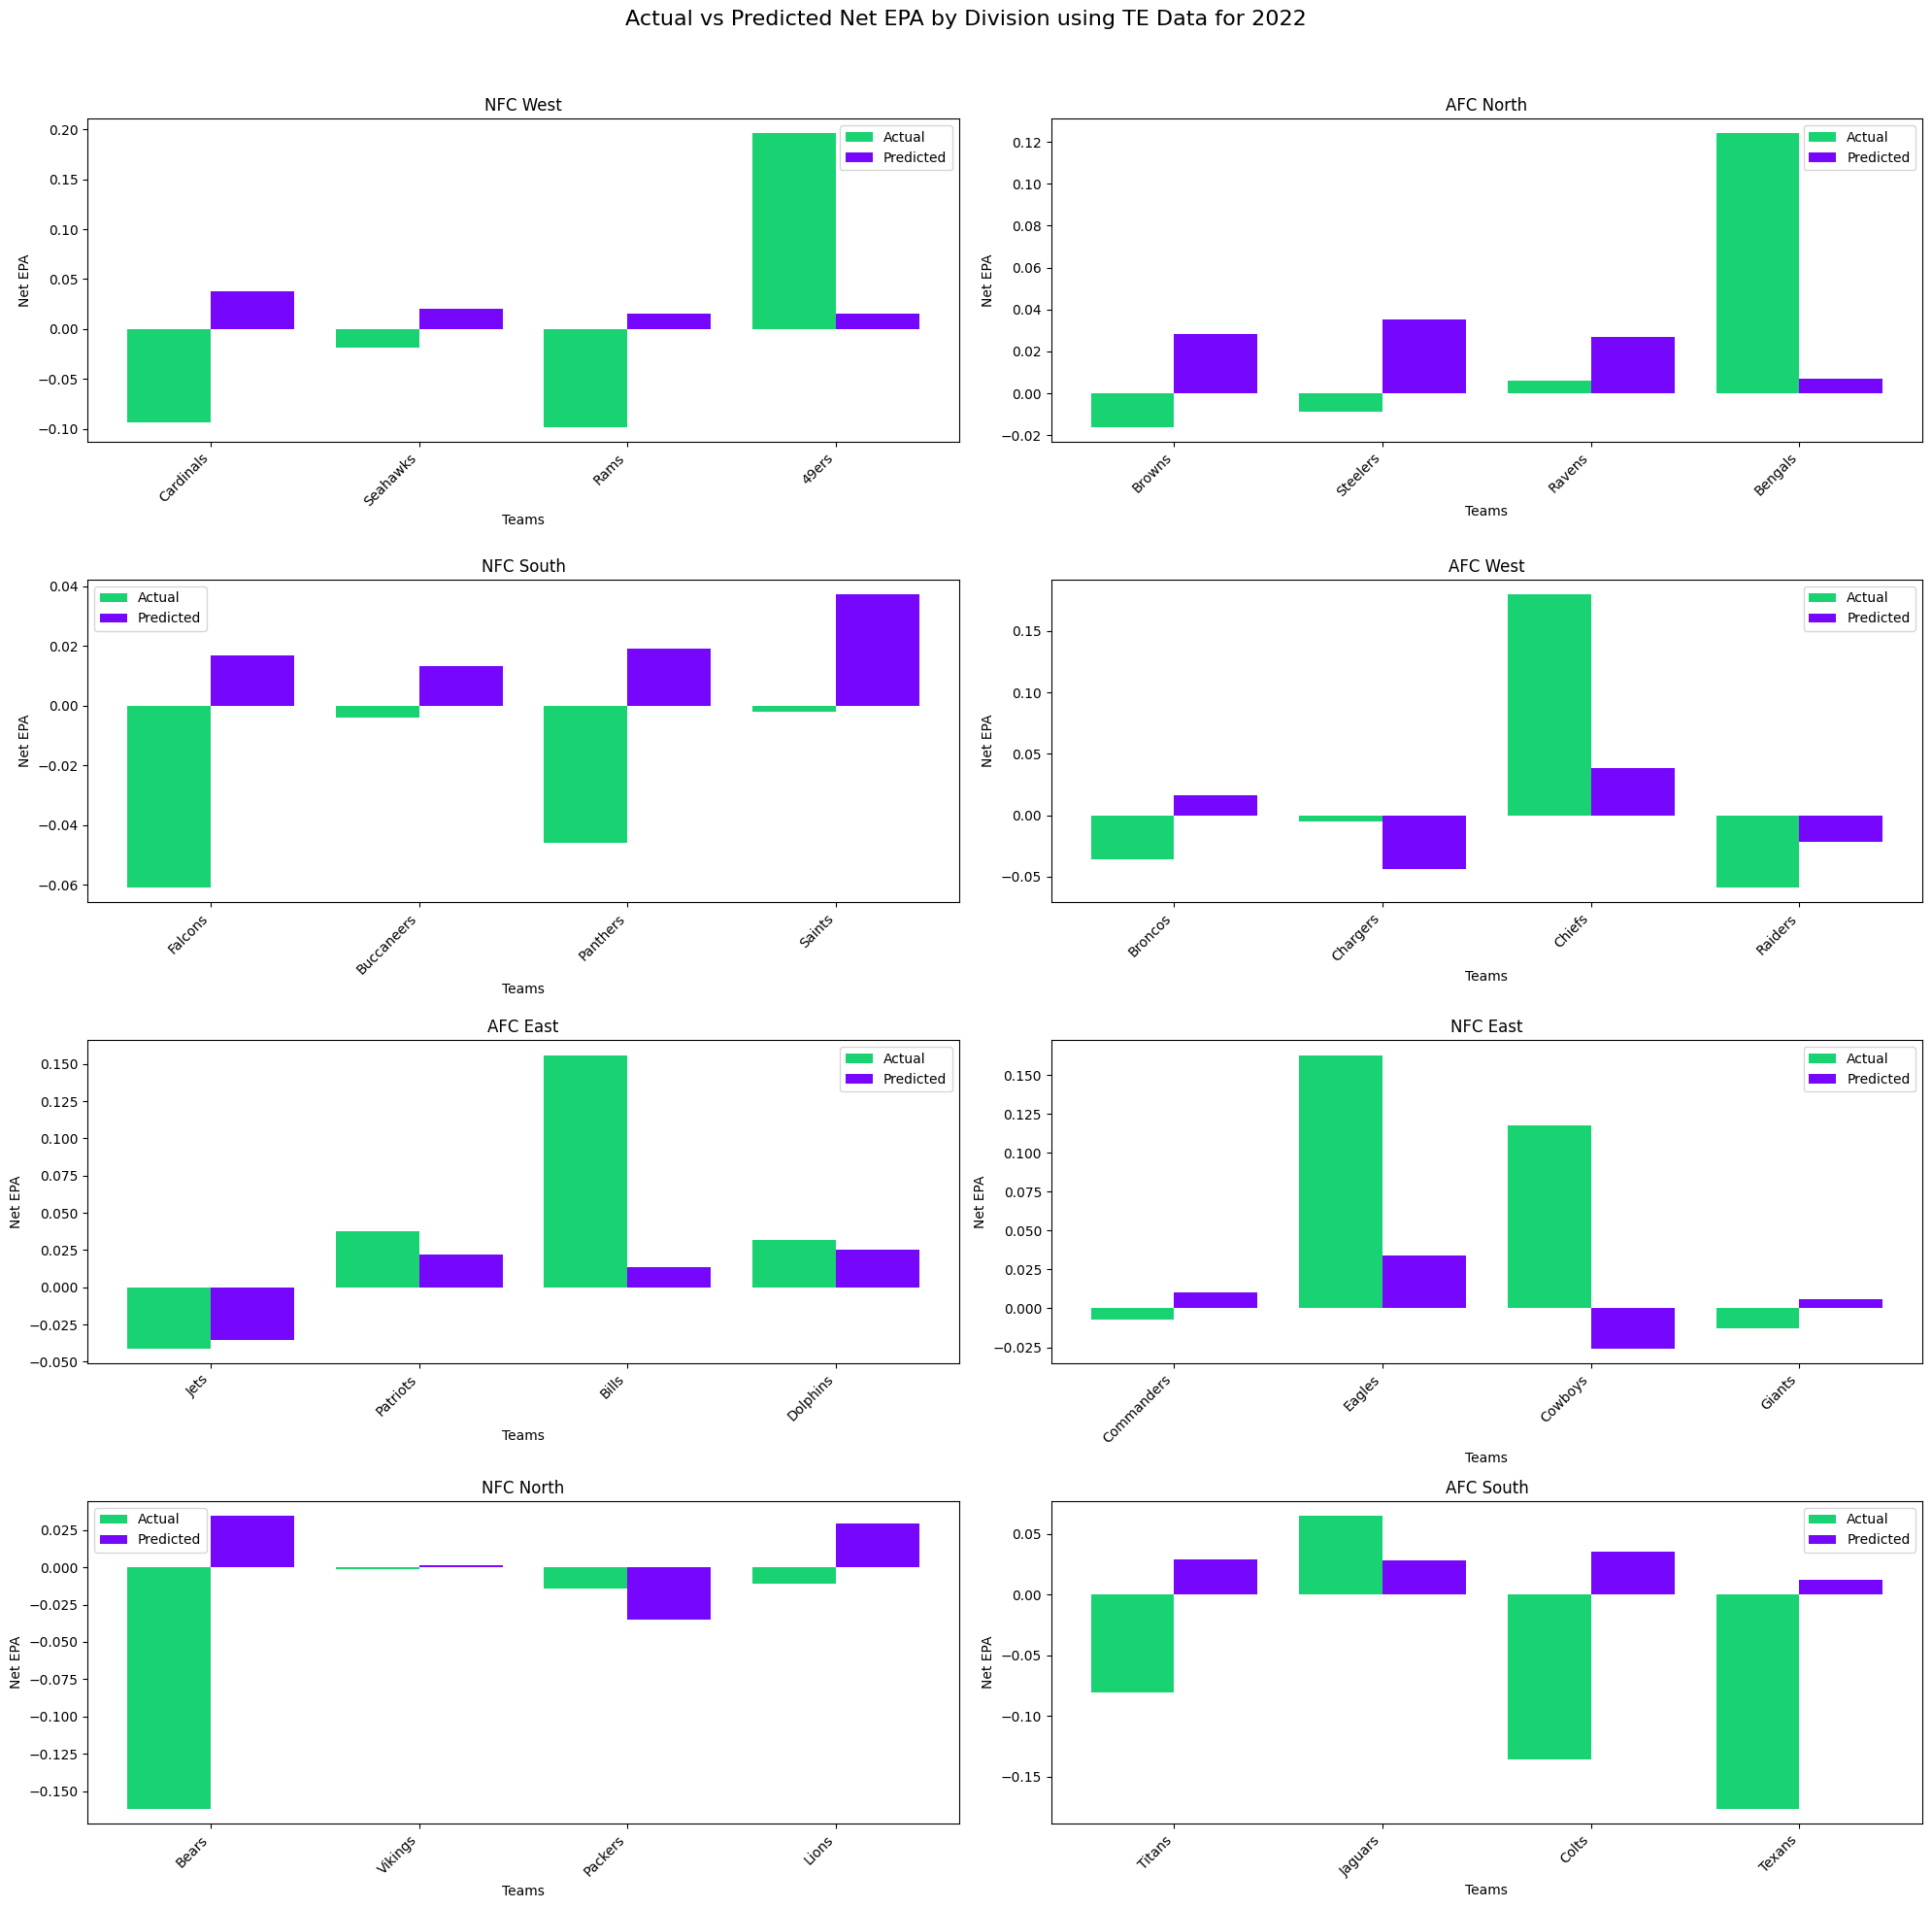

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0115 - val_loss: 0.0079
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0075
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - val_loss: 0.0076
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - val_loss: 0.0083
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0101


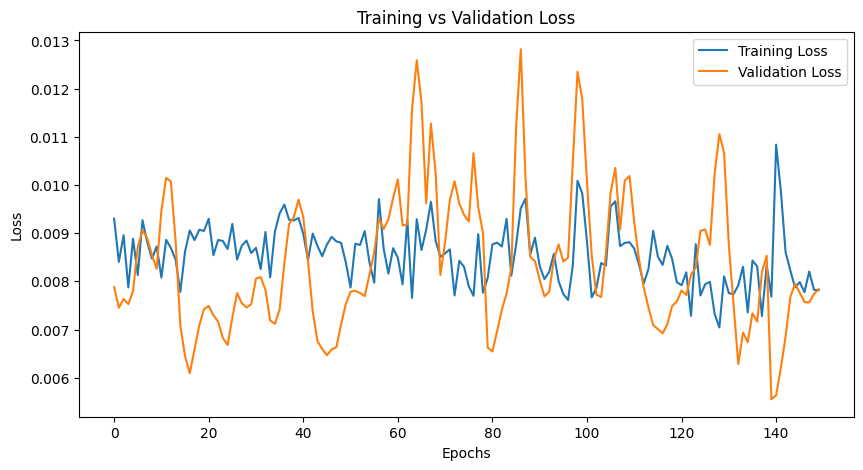

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32
R² Score: 0.0701


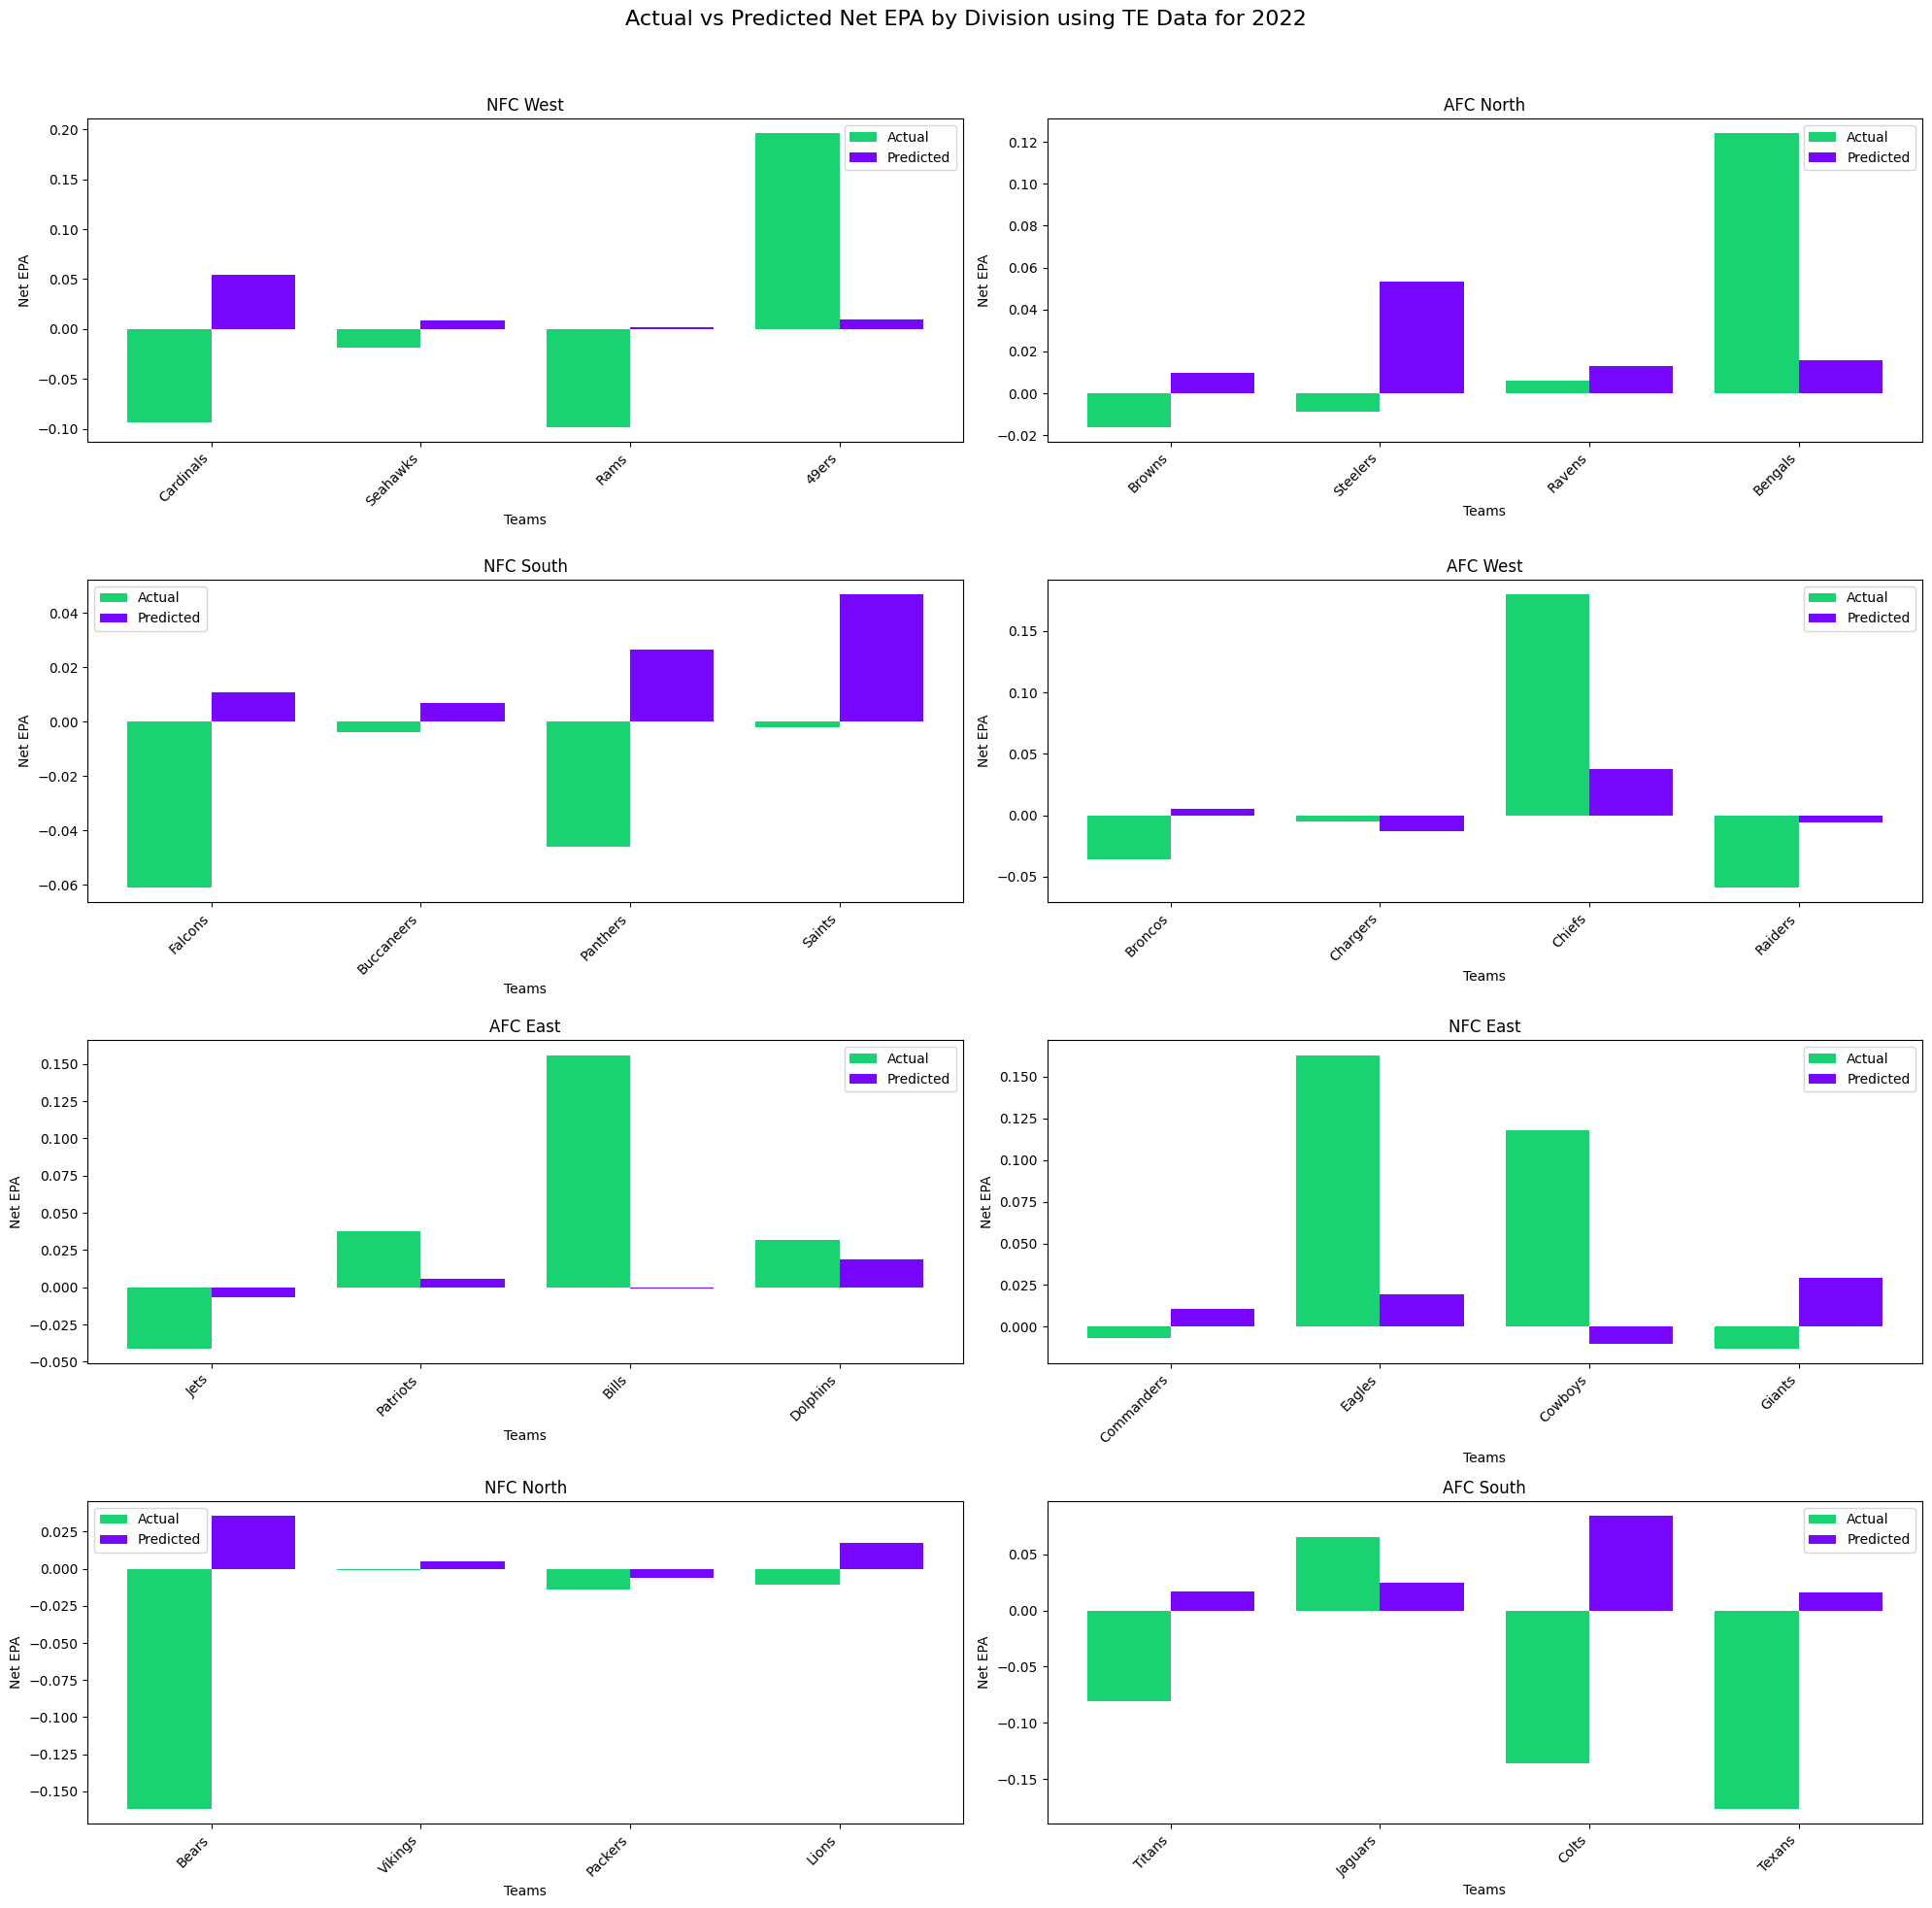

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - val_loss: 0.0071
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - val_loss: 0.0085
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - val_loss: 0.0093
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0060 - val_loss: 0.0081
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - val_loss: 0

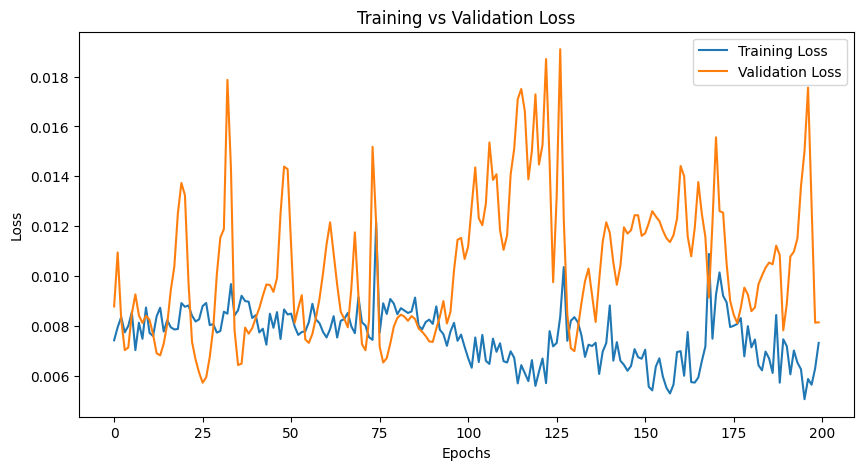

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
32
R² Score: 0.1179


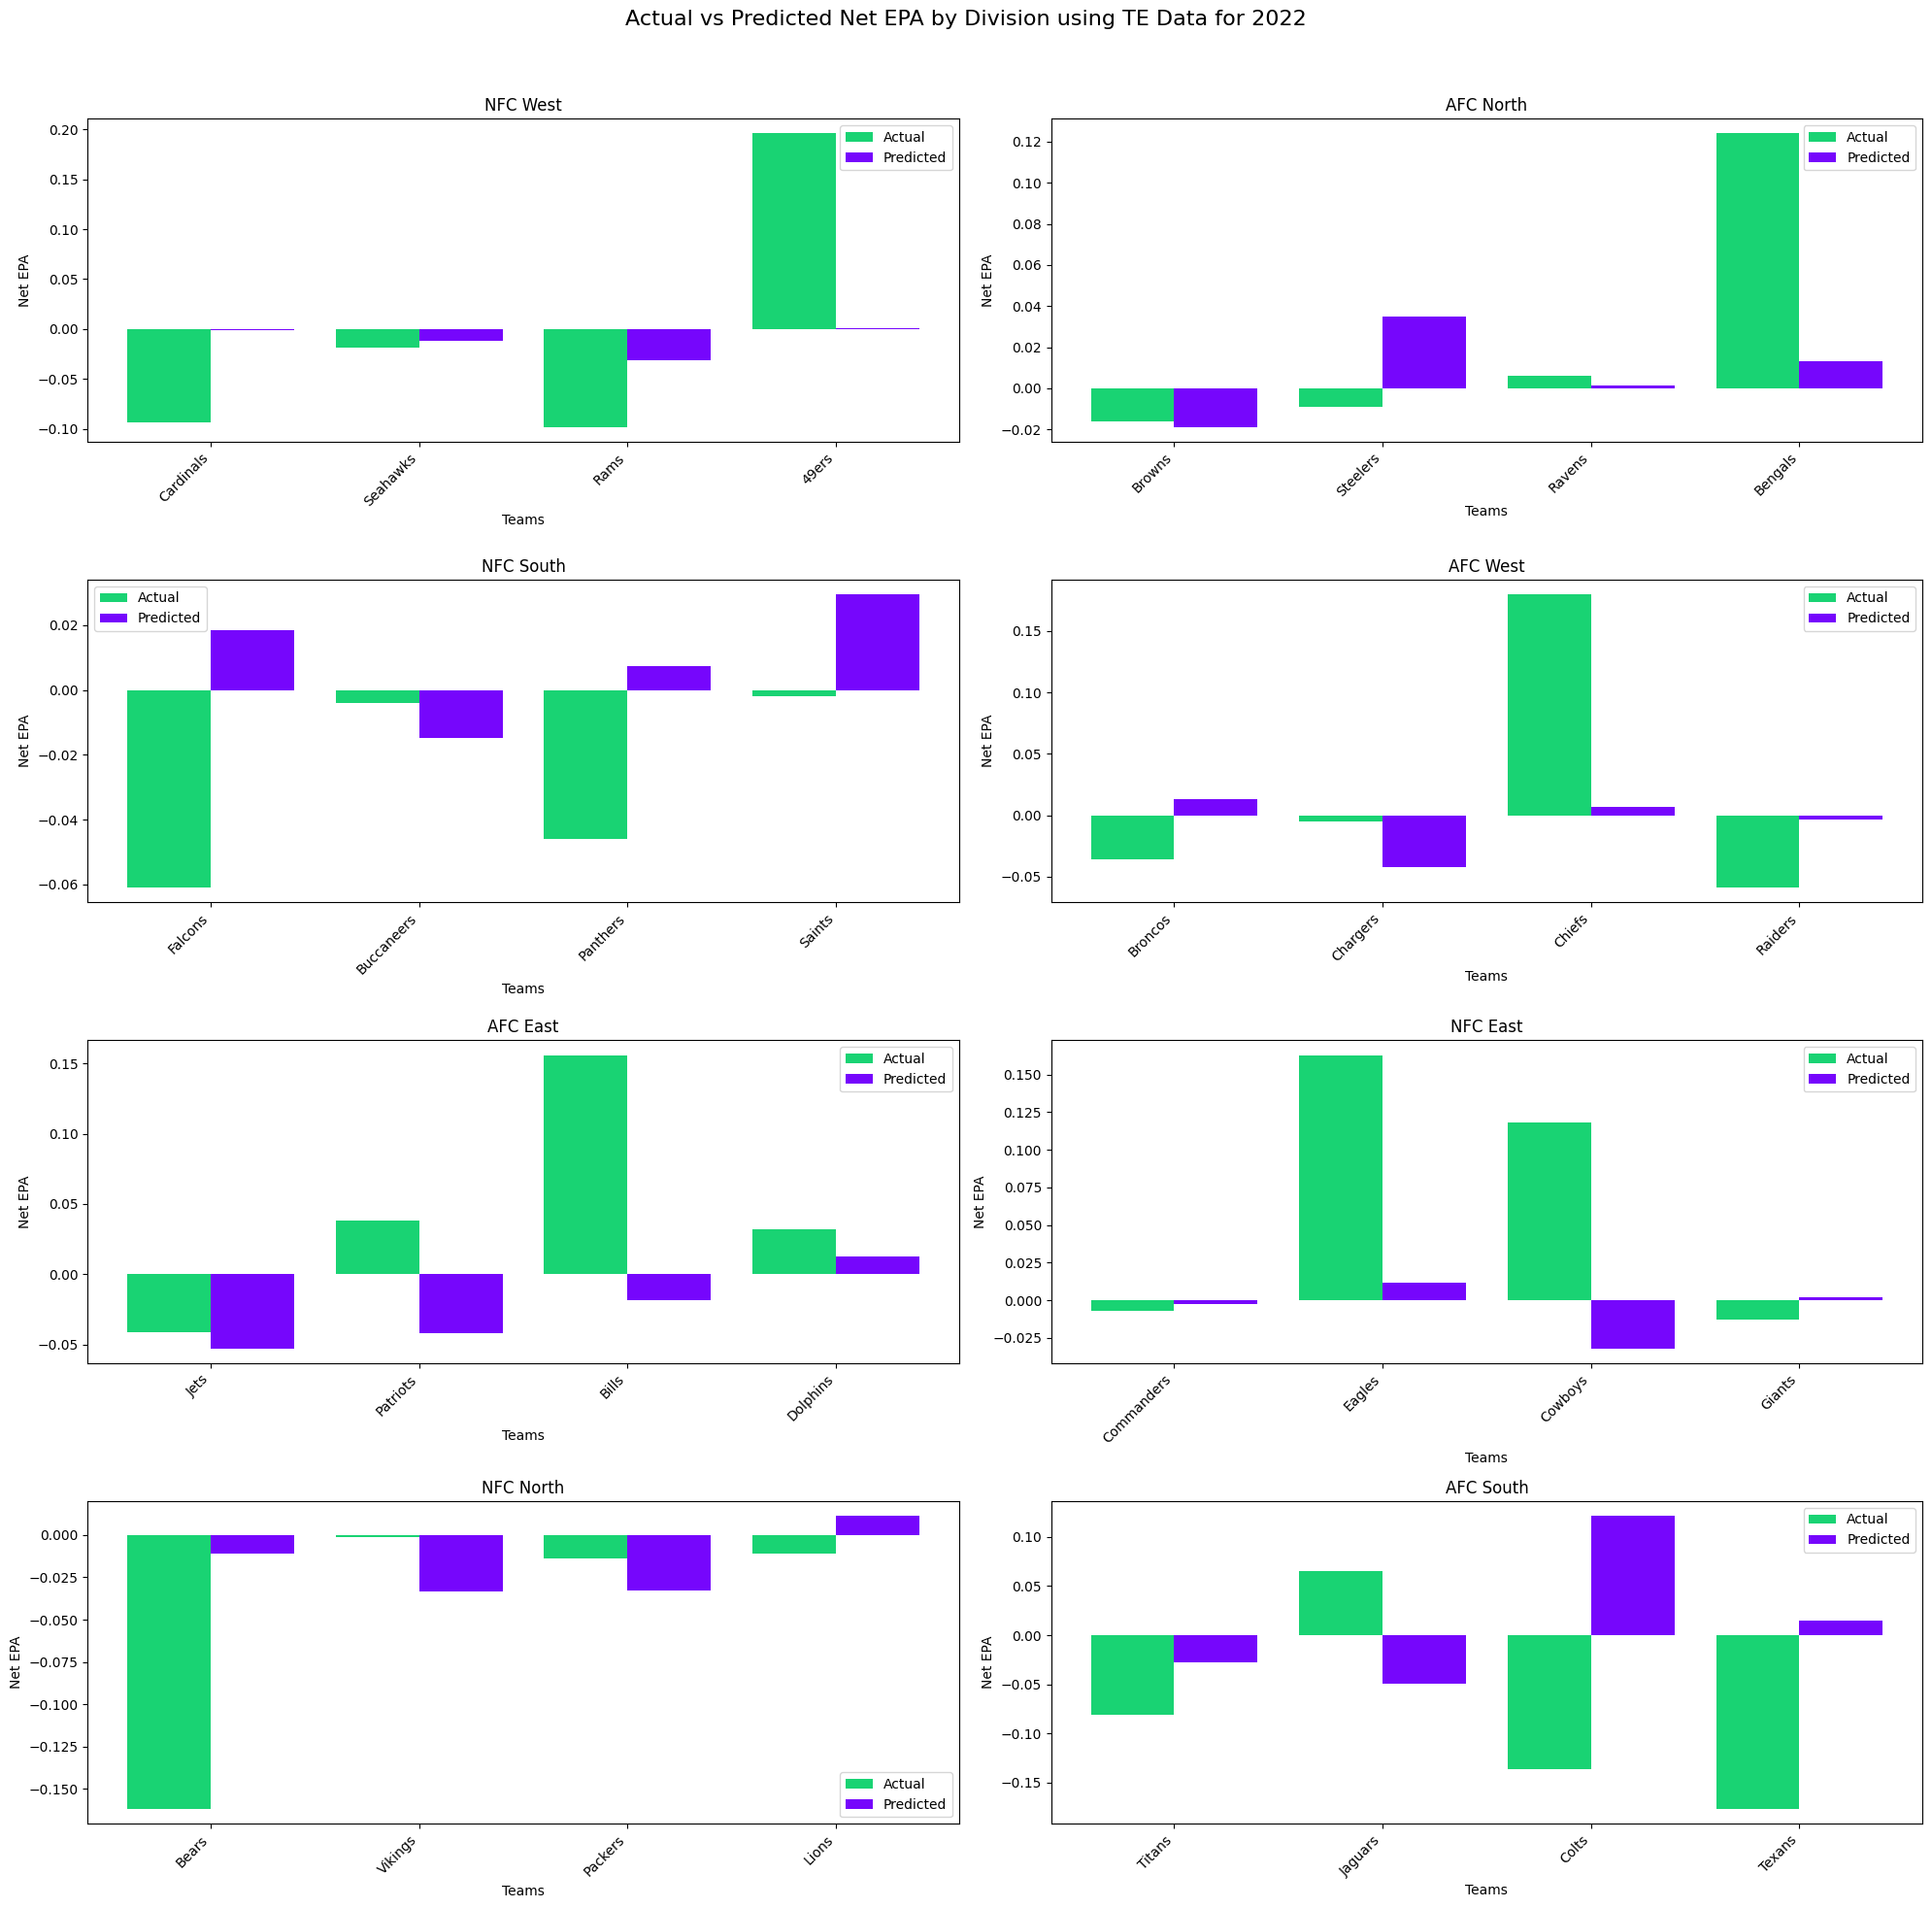

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0072 - val_loss: 0.0089
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - val_loss: 0.0091
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 0.0108
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0120
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - val_loss: 0.0141
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0138
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - val_loss: 0.0148


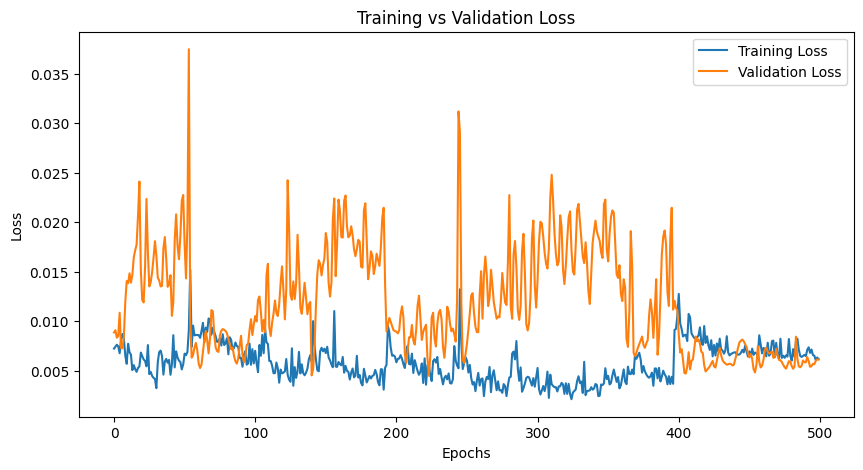

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32
R² Score: 0.2641


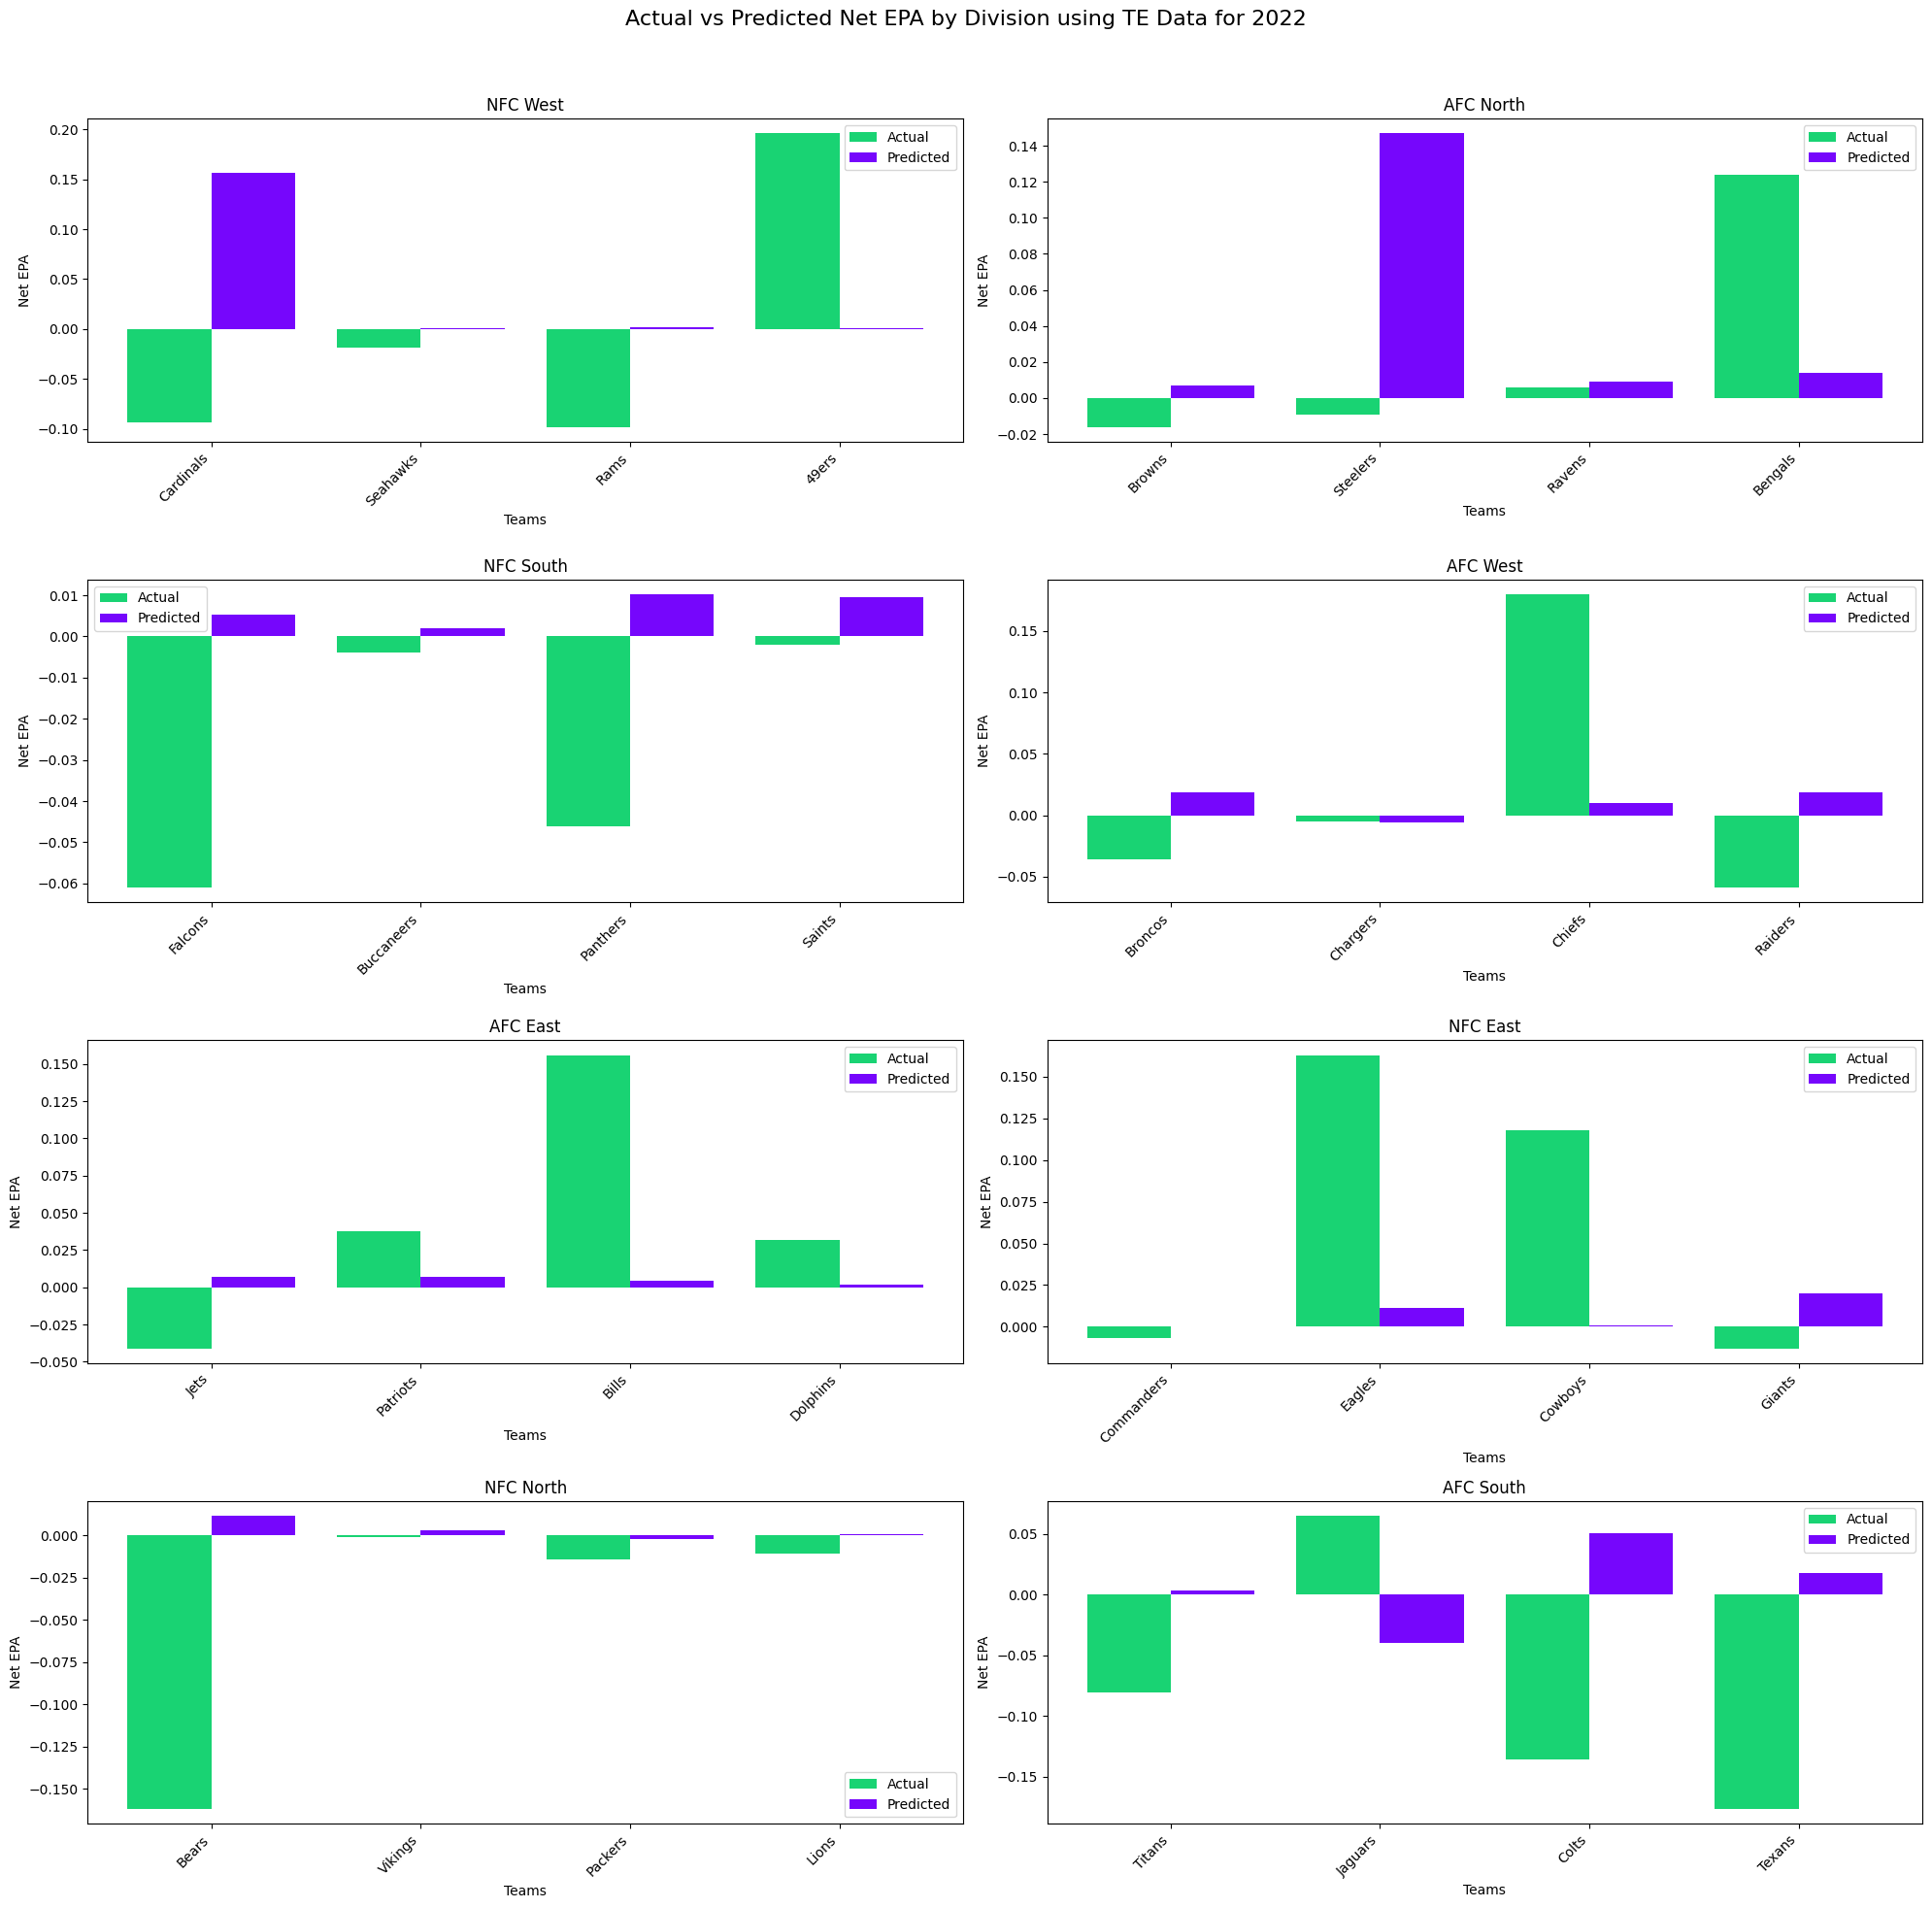

Epoch 1/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 2/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - val_loss: 0.0077
Epoch 3/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - val_loss: 0.0075
Epoch 4/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0079
Epoch 5/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0073
Epoch 6/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 7/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - val_loss: 0.0049
Epoch 8/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 9/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 10/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 11/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - val_loss: 0.0048
Epoch 12/750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.0052


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
te_df = pd.read_csv('Combined_TE.csv')  # Reading in Combined Positional data
te_df = te_df.drop(columns=['Unnamed: 0'])  # Drop unnecessary columns
team_data = te_df.groupby('Team')

sequences = []
targets = []

import numpy as np

sequences = []
targets = []
teams = []

# Iterate over each team and its respective data
for team, group in team_data:
    teams.append(team)
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['win-loss-pct', 
                                          'weighted_avg_targeted_qb_rating', 
                                          'weighted_avg_touchdowns', 
                                          'Current_AV', 
                                          'Previous_yards_per_reception',
                                          'Current_PFF']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Define the model architecture
# Define the input layer
inputs = Input(shape=(3, 6))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [50, 100, 150, 200, 500, 750, 1000]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    print(len(y_pred))
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = df[df['Year'] == 2022].copy()
    data['Predicted_Net_EPA'] = y_pred
    data['Model Actual Net EPA'] = y
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Net EPA by Division using TE Data for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Net EPA')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
        